In [52]:
import yfinance as yf
import pandas as pd
import requests
import zipfile
import io
import numpy as np
from datetime import datetime
import numpy as np
import yfinance as yf
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault) 
import matplotlib.ticker as mtick 
import matplotlib.dates as mdates 
from matplotlib import patches as mpatches


In [53]:
nom_fichier = r"C:\Users\Asus-Pc\Desktop\vscode\esg-factor-investing-eurostoxx50\famafrench.xlsx"
famafrench = pd.read_excel(nom_fichier)
famafrench = famafrench.sort_values(by='Date', ascending=True)
print(famafrench.head(10))

        Date    Mkt-RF       SMB       HML       RF
0 1990-07-02  0.990000  0.060000 -0.560000 0.030000
1 1990-07-03  0.330000 -0.110000  0.000000 0.030000
2 1990-07-04  0.240000  0.000000 -0.190000 0.030000
3 1990-07-05 -0.640000  0.200000  0.080000 0.030000
4 1990-07-06  0.070000 -0.180000  0.130000 0.030000
5 1990-07-09  0.490000  0.030000 -0.250000 0.030000
6 1990-07-10  0.010000  0.360000 -0.410000 0.030000
7 1990-07-11 -0.340000 -0.480000 -0.060000 0.030000
8 1990-07-12  0.620000 -0.170000 -0.010000 0.030000
9 1990-07-13  0.480000 -0.610000  0.010000 0.030000


In [54]:
start_date = '2021-01-01'
end_date = '2024-12-31'

nom_fichier_ff = r"C:\Users\Asus-Pc\Desktop\vscode\esg-factor-investing-eurostoxx50\famafrench.xlsx"

eurostoxx_tickers = [
    "MC.PA",
    "RMS.PA",
    "OR.PA",
    "SU.PA",
    "SAN.PA",
    "TTE.PA",
    "EL.PA",
    "AIR.PA",
    "AI.PA",
    "SAF.PA",
    "CS.PA",
    "BNP.PA",
    "DG.PA",
    "BN.PA",
    "SGO.PA",
    "RI.PA",
    "KER.PA",
    "STLAP.PA",
    "DHL.DE",
    "BMW.DE",
    "DTE.DE",
    "SIE.DE",
    "ALV.DE",
    "SAP.DE",
    "MUV2.DE",
    "DB1.DE",
    "MBG.DE",
    "VOW3.DE",
    "BAS.DE",
    "ADS.DE",
    "IFX.DE",
    "BAYN.DE",
    "ASML.AS",
    "PRX.AS",
    "INGA.AS",
    "ADYEN.AS",
    "WKL.AS",
    "AD.AS",
    "ITX.MC",
    "IBE.MC",
    "SAN.MC",
    "BBVA.MC",
    "ISP.MI",
    "UCG.MI",
    "RACE.MI",
    "ENEL.MI",
    "ENI.MI",
    "ABI.BR",
    "NDA-FI.HE",
    "NOKIA.HE",
    "^STOXX50E"
]

print("1. Chargement des données Fama-French...")
try:
    famafrench = pd.read_excel(nom_fichier_ff)
    famafrench['Date'] = pd.to_datetime(famafrench['Date'])
    famafrench = famafrench.sort_values(by='Date')
    famafrench.set_index('Date', inplace=True)
    famafrench = famafrench.loc[start_date:end_date]

    required_ff_cols = ['Mkt-RF', 'SMB', 'HML', 'RF']
    if not all(col in famafrench.columns for col in required_ff_cols):
        raise ValueError(f"Le fichier Excel doit contenir les colonnes: {required_ff_cols}")

    for col in required_ff_cols:
      if famafrench[col].abs().max() > 1:
          print(f"Conversion de la colonne '{col}' de pourcentage en décimal.")
          famafrench[col] = famafrench[col] / 100.0

    print("Données Fama-French chargées et préparées.")
    print(f"Période Fama-French utilisée: {famafrench.index.min()} à {famafrench.index.max()}")

except FileNotFoundError:
    print(f"ERREUR: Le fichier '{nom_fichier_ff}' n'a pas été trouvé.")
    exit()
except Exception as e:
    print(f"ERREUR lors du chargement ou traitement du fichier Fama-French: {e}")
    exit()

famafrench = famafrench.reset_index()

1. Chargement des données Fama-French...
Conversion de la colonne 'Mkt-RF' de pourcentage en décimal.
Conversion de la colonne 'SMB' de pourcentage en décimal.
Conversion de la colonne 'HML' de pourcentage en décimal.
Données Fama-French chargées et préparées.
Période Fama-French utilisée: 2021-01-01 00:00:00 à 2024-12-31 00:00:00


In [55]:
nom_fichier_ps = r"C:\Users\Asus-Pc\Desktop\vscode\esg-factor-investing-eurostoxx50\piliersocial.xlsx"
piliersocial = pd.read_excel(nom_fichier_ps)

piliersocial_transpose = (
    piliersocial.set_index('Action')
    .rename_axis(None)
    .T
    .reset_index()
    .rename(columns={'index': 'Année'})
)

piliersocial_transpose.columns.name = None
piliersocial_transpose = piliersocial_transpose.rename(columns={'index': ''})

colonnes_actions = piliersocial_transpose.drop(columns='Année')

moyenne_indice_par_annee = colonnes_actions.mean(axis=1)

piliersocial_transpose['EUROSTOXX_50'] = moyenne_indice_par_annee

print("Tableau avec la moyenne de l'indice ajoutée :")
piliersocial_transpose

Tableau avec la moyenne de l'indice ajoutée :


,Année,LVMH,HERMES,ASML,LOREAL,DT-TELEKOM,SIEMENS,INDITEX,ALLIANZ,SCHNEIDER-ELEC,...,ADIDAS,WOLTERS-KLUWER,INFINEON TECH,AHOLD,NOKIA,PERNOD-RICARD,STELLANTIS,KERING,BAYER,EUROSTOXX_50
0,2024,90.460000,63.010000,79.800000,88.420000,88.400000,79.680000,97.090000,87.740000,93.360000,...,92.710000,64.580000,79.860000,71.740000,78.950000,57.110000,90.780000,85.420000,97.120000,81.926400
1,2023,86.620000,64.290000,80.940000,89.420000,91.160000,81.410000,97.270000,87.350000,82.080000,...,92.040000,61.160000,81.180000,71.790000,83.270000,58.200000,91.720000,94.510000,97.690000,82.307240
2,2022,85.640000,64.260000,83.360000,88.480000,92.110000,81.280000,95.670000,9.230000,83.630000,...,94.020000,76.410000,82.410000,77.760000,84.740000,62.360000,94.680000,94.830000,97.540000,81.605800
3,2021,80.150000,66.380000,86.200000,86.680000,93.870000,81.390000,95.670000,92.290000,84.610000,...,92.440000,77.270000,83.690000,84.300000,86.090000,63.060000,92.740000,95.280000,97.040000,81.758200


In [56]:
piliersocial_transpose.columns.name = None

start_date = datetime(2021, 1, 1)
end_date = datetime(2024, 12, 31)

all_dates = pd.date_range(start=start_date, end=end_date, freq='D')
df_daily = pd.DataFrame({'Date': all_dates})

df_daily['Année'] = df_daily['Date'].dt.year

piliersocial_transpose = pd.merge(
    df_daily,
    piliersocial_transpose,
    on='Année',
    how='left'
)

piliersocial_transpose = piliersocial_transpose.drop(columns=['Année'])

cols = ['Date'] + [col for col in piliersocial_transpose.columns if col != 'Date']
piliersocial_transpose = piliersocial_transpose[cols]


print("--- Préparation des Données Fama-French et ESG ---")

print("\n1. Préparation des données Fama-French...")
try:
    famafrench_df = famafrench.copy()

    if 'Date' not in famafrench_df.columns:
         raise ValueError("Colonne 'Date' introuvable dans le DataFrame Fama-French.")
    famafrench_df['Date'] = pd.to_datetime(famafrench_df['Date'])

    famafrench_df = famafrench_df.set_index('Date').sort_index()

    famafrench_prepared = famafrench_df.loc[start_date:end_date].copy()
    if famafrench_prepared.empty:
         print(f"AVERTISSEME/NT: Aucune donnée Fama-French trouvée pour la période {start_date} à {end_date}.")

    required_ff_cols = ['Mkt-RF', 'SMB', 'HML', 'RF']
    if not all(col in famafrench_prepared.columns for col in required_ff_cols):
        missing_cols = [col for col in required_ff_cols if col not in famafrench_prepared.columns]
        raise ValueError(f"Colonnes Fama-French requises manquantes après filtrage: {missing_cols}")

    print("  Vérification et conversion potentielle des facteurs Fama-French en décimal...")
    for col in required_ff_cols:
        if famafrench_prepared[col].abs().max() > 1:
            print(f"    Conversion de la colonne '{col}' de pourcentage en décimal.")
            famafrench_prepared[col] = famafrench_prepared[col] / 100.0

    print("  Données Fama-French préparées et filtrées.")
    print(f"  Période Fama-French utilisée: {famafrench_prepared.index.min()} à {famafrench_prepared.index.max()}")

except Exception as e:
    print(f"ERREUR lors de la préparation du DataFrame Fama-French: {e}")
    raise

print("\n2. Préparation des Données ESG quotidiennes...")
try:
    piliersocial_df = piliersocial_transpose.copy()

    date_col_esg = 'Date'
    if date_col_esg not in piliersocial_df.columns:
         raise ValueError(f"Colonne '{date_col_esg}' introuvable dans le DataFrame ESG (piliersocial_transpose). Colonnes: {piliersocial_df.columns.tolist()}")
    piliersocial_df[date_col_esg] = pd.to_datetime(piliersocial_df[date_col_esg])

    piliersocial_indexed = piliersocial_df.set_index(date_col_esg).sort_index()

    print("  Données ESG quotidiennes mises en index par Date.")

except Exception as e:
    print(f"ERREUR lors de la préparation du DataFrame ESG: {e}")
    raise

ticker_to_esg_name_map = {
    "MC.PA": "LVMH",
    "RMS.PA": "HERMES",
    "OR.PA": "LOREAL",
    "SU.PA": "SCHNEIDER-ELEC",
    "SAN.PA": "SANOFI",
    "TTE.PA": "TOTALENERGIES",
    "EL.PA": "ESSILORLUXOTTICA",
    "AIR.PA": "AIRBUS",
    "AI.PA": "AIR LIQUIDE",
    "SAF.PA": "SAFRAN",
    "CS.PA": "AXA",
    "BNP.PA": "BNP PARIBAS",
    "DG.PA": "VINCI",
    "BN.PA": "DANONE",
    "SGO.PA": "SAINTGOBAIN",
    "RI.PA": "PERNOD-RICARD",
    "KER.PA": "KERING",
    "STLAP.PA": "STELLANTIS",
    "DHL.DE": "DHL",
    "BMW.DE": "BMW",
    "DTE.DE": "DT-TELEKOM",
    "SIE.DE": "SIEMENS",
    "ALV.DE": "ALLIANZ",
    "SAP.DE": "SAP",
    "MUV2.DE": "MUENCH-RUECK",
    "DB1.DE": "DEUTSCHE-BÖRSE",
    "MBG.DE": "MERCEDES-BENZ",
    "VOW3.DE": "VOLKSWAGEN",
    "BAS.DE": "BASF",
    "ADS.DE": "ADIDAS",
    "IFX.DE": "INFINEON TECH",
    "BAYN.DE": "BAYER",
    "ASML.AS": "ASML",
    "PRX.AS": "PROSUS",
    "INGA.AS": "ING-GROEP",
    "ADYEN.AS": "ADYEN",
    "WKL.AS": "WOLTERS-KLUWER",
    "AD.AS": "AHOLD",
    "ITX.MC": "INDITEX",
    "IBE.MC": "IBERDROLA",
    "SAN.MC": "BANCO-SANTANDE",
    "BBVA.MC": "BBVA",
    "ISP.MI": "INTESA-SANPAOLO",
    "UCG.MI": "UNICREDIT",
    "RACE.MI": "FERRARI",
    "ENEL.MI": "ENEL",
    "ENI.MI": "ENI",
    "ABI.BR": "AB INBEV",
    "NDA-FI.HE": "NORDEA-BANK",
    "NOKIA.HE": "NOKIA",
    "^STOXX50E": "EUROSTOXX_50"
}

print("\n3. Alignement direct des données ESG sur l'index Fama-French...")
try:
    if 'famafrench_prepared' not in locals() or famafrench_prepared.empty:
         raise RuntimeError("Les données Fama-French n'ont pas pu être préparées. Alignement ESG impossible.")

    esg_data = pd.DataFrame(index=famafrench_prepared.index)

    missing_tickers_in_map = []
    missing_cols_in_esg = []
    processed_tickers_count = 0

    for ticker in eurostoxx_tickers:
        if ticker not in ticker_to_esg_name_map:
            missing_tickers_in_map.append(ticker)
            continue

        esg_col_name = ticker_to_esg_name_map[ticker]

        if esg_col_name not in piliersocial_indexed.columns:
            missing_cols_in_esg.append(f"{ticker} (mappé à '{esg_col_name}')")
            continue

        esg_data[ticker] = piliersocial_indexed[esg_col_name]
        processed_tickers_count += 1

    print(f"\n  Données ESG alignées pour {processed_tickers_count} tickers.")

    if missing_tickers_in_map:
        print(f"\nAVERTISSEMENT : Aucun mapping trouvé pour : {missing_tickers_in_map}")
    if missing_cols_in_esg:
        print(f"\nAVERTISSEMENT : Colonnes ESG correspondantes non trouvées dans 'piliersocial_indexed' pour : {missing_cols_in_esg}")

    nan_counts = esg_data.isnull().sum()
    tickers_with_nans = nan_counts[nan_counts > 0]
    if not tickers_with_nans.empty:
        print("\nAVERTISSEMENT : Des valeurs NaN existent dans le DataFrame ESG final.")
        print("  Causes possibles: Données manquantes dans le fichier ESG d'origine,")
        print("  ou la plage de dates ESG ne couvre pas toute la période Fama-French sélectionnée.")
    else:
        print("\n  Aucune valeur NaN détectée dans le DataFrame ESG final.")

except Exception as e:
    print(f"ERREUR lors de l'alignement des données ESG: {e}")
    raise

esg_data

--- Préparation des Données Fama-French et ESG ---

1. Préparation des données Fama-French...
  Vérification et conversion potentielle des facteurs Fama-French en décimal...
  Données Fama-French préparées et filtrées.
  Période Fama-French utilisée: 2021-01-01 00:00:00 à 2024-12-31 00:00:00

2. Préparation des Données ESG quotidiennes...
  Données ESG quotidiennes mises en index par Date.

3. Alignement direct des données ESG sur l'index Fama-French...

  Données ESG alignées pour 51 tickers.

  Aucune valeur NaN détectée dans le DataFrame ESG final.


,MC.PA,RMS.PA,OR.PA,SU.PA,SAN.PA,TTE.PA,EL.PA,AIR.PA,AI.PA,SAF.PA,...,BBVA.MC,ISP.MI,UCG.MI,RACE.MI,ENEL.MI,ENI.MI,ABI.BR,NDA-FI.HE,NOKIA.HE,^STOXX50E
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,80.150000,66.380000,86.680000,84.610000,92.120000,90.020000,80.640000,87.610000,90.150000,71.570000,...,79.040000,93.900000,84.220000,71.280000,94.020000,91.960000,50.800000,66.740000,86.090000,81.758200
2021-01-04,80.150000,66.380000,86.680000,84.610000,92.120000,90.020000,80.640000,87.610000,90.150000,71.570000,...,79.040000,93.900000,84.220000,71.280000,94.020000,91.960000,50.800000,66.740000,86.090000,81.758200
2021-01-05,80.150000,66.380000,86.680000,84.610000,92.120000,90.020000,80.640000,87.610000,90.150000,71.570000,...,79.040000,93.900000,84.220000,71.280000,94.020000,91.960000,50.800000,66.740000,86.090000,81.758200
2021-01-06,80.150000,66.380000,86.680000,84.610000,92.120000,90.020000,80.640000,87.610000,90.150000,71.570000,...,79.040000,93.900000,84.220000,71.280000,94.020000,91.960000,50.800000,66.740000,86.090000,81.758200
2021-01-07,80.150000,66.380000,86.680000,84.610000,92.120000,90.020000,80.640000,87.610000,90.150000,71.570000,...,79.040000,93.900000,84.220000,71.280000,94.020000,91.960000,50.800000,66.740000,86.090000,81.758200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-25,90.460000,63.010000,88.420000,93.360000,88.700000,85.850000,77.260000,82.850000,91.660000,72.830000,...,90.730000,93.490000,67.410000,59.410000,91.200000,91.150000,65.670000,68.020000,78.950000,81.926400
2024-12-26,90.460000,63.010000,88.420000,93.360000,88.700000,85.850000,77.260000,82.850000,91.660000,72.830000,...,90.730000,93.490000,67.410000,59.410000,91.200000,91.150000,65.670000,68.020000,78.950000,81.926400
2024-12-27,90.460000,63.010000,88.420000,93.360000,88.700000,85.850000,77.260000,82.850000,91.660000,72.830000,...,90.730000,93.490000,67.410000,59.410000,91.200000,91.150000,65.670000,68.020000,78.950000,81.926400


In [57]:
print("--- Préparation des Données Fama-French, ESG et Actions ---")

print("\n1. Préparation des données Fama-French...")
try:
    famafrench_df = famafrench.copy()
    if 'Date' not in famafrench_df.columns:
         raise ValueError("Colonne 'Date' introuvable dans le DataFrame Fama-French.")
    famafrench_df['Date'] = pd.to_datetime(famafrench_df['Date'])
    famafrench_df = famafrench_df.set_index('Date').sort_index()

    start_dt = pd.to_datetime(start_date)
    end_dt = pd.to_datetime(end_date)

    famafrench_prepared = famafrench_df.loc[start_dt:end_dt].copy()
    if famafrench_prepared.empty:
         print(f"AVERTISSEMENT: Aucune donnée Fama-French trouvée pour la période {start_date} à {end_date}.")

    required_ff_cols = ['Mkt-RF', 'SMB', 'HML', 'RF']
    if not famafrench_prepared.empty and not all(col in famafrench_prepared.columns for col in required_ff_cols):
        missing_cols = [col for col in required_ff_cols if col not in famafrench_prepared.columns]
        raise ValueError(f"Colonnes Fama-French requises manquantes après filtrage: {missing_cols}")

    if not famafrench_prepared.empty:
        print("  Vérification et conversion potentielle des facteurs Fama-French en décimal...")
        for col in required_ff_cols:
            if col in famafrench_prepared.columns:
                if not famafrench_prepared[col].isnull().all():
                    if famafrench_prepared[col].abs().max() > 1:
                        print(f"    Conversion de la colonne '{col}' de pourcentage en décimal.")
                        famafrench_prepared[col] = famafrench_prepared[col] / 100.0
                else:
                     print(f"    Colonne '{col}' est entièrement vide, conversion ignorée.")

        print("  Données Fama-French préparées et filtrées.")
        print(f"  Période Fama-French utilisée: {famafrench_prepared.index.min()} à {famafrench_prepared.index.max()}")
    else:
        print("  Le DataFrame Fama-French est vide après filtrage, étapes suivantes peuvent échouer.")

except Exception as e:
    print(f"ERREUR lors de la préparation du DataFrame Fama-French: {e}")
    raise

print("\n2. Préparation des Données ESG (Pilier Social)...")
try:
    piliersocial_df = piliersocial_transpose.copy()
    date_col_esg = 'Date'
    if date_col_esg not in piliersocial_df.columns:
         raise ValueError(f"Colonne '{date_col_esg}' introuvable dans le DataFrame ESG (piliersocial_transpose). Colonnes: {piliersocial_df.columns.tolist()}")
    piliersocial_df[date_col_esg] = pd.to_datetime(piliersocial_df[date_col_esg])
    piliersocial_indexed = piliersocial_df.set_index(date_col_esg).sort_index()
    print("  Données ESG quotidiennes mises en index par Date.")

except Exception as e:
    print(f"ERREUR lors de la préparation du DataFrame ESG: {e}")
    raise

print("\n3. Chargement et calcul des rendements des actions individuelles...")
all_returns_series = []

try:
    download_start_dt = start_dt - pd.Timedelta(days=1)
    download_end_dt = end_dt + pd.Timedelta(days=1)

    download_start_str = download_start_dt.strftime('%Y-%m-%d')
    download_end_str = download_end_dt.strftime('%Y-%m-%d')
    print(f"  Période de téléchargement des actions: {download_start_str} à {download_end_str}")

    for ticker in eurostoxx_tickers:
        try:
            stock_data = yf.download(ticker,
                                     start=download_start_str,
                                     end=download_end_str,
                                     progress=False,
                                     auto_adjust=True,
                                     actions=False)

            if not stock_data.empty and 'Close' in stock_data.columns:
                stock_returns = np.log(stock_data['Close'] / stock_data['Close'].shift(1))
                stock_returns.name = ticker
                all_returns_series.append(stock_returns)
            elif stock_data.empty:
                print(f"   - {ticker}: AVERTISSEMENT - Aucune donnée trouvée par yfinance.")
            else:
                 print(f"   - {ticker}: AVERTISSEMENT - Données trouvées, mais colonne 'Close' manquante.")

        except Exception as e:
            print(f"   - {ticker}: ERREUR lors du téléchargement/calcul - {e}")

    if all_returns_series:
        all_stock_returns_raw = pd.concat(all_returns_series, axis=1)
        all_stock_returns_raw = all_stock_returns_raw.iloc[1:]

        print(f"  Rendements calculés pour {len(all_stock_returns_raw.columns)} tickers.")
        print(f"  Période des rendements bruts: {all_stock_returns_raw.index.min()} à {all_stock_returns_raw.index.max()}")
    else:
        print("ERREUR: Aucune série de rendement d'action n'a pu être créée.")
        all_stock_returns_raw = pd.DataFrame()

except Exception as e:
    print(f"ERREUR majeure lors du chargement ou traitement des données actions: {e}")
    all_stock_returns_raw = pd.DataFrame()

all_stock_returns_raw = all_stock_returns_raw.dropna()

all_stock_returns_raw.dropna(inplace=True)

all_stock_returns_raw

--- Préparation des Données Fama-French, ESG et Actions ---

1. Préparation des données Fama-French...
  Vérification et conversion potentielle des facteurs Fama-French en décimal...
  Données Fama-French préparées et filtrées.
  Période Fama-French utilisée: 2021-01-01 00:00:00 à 2024-12-31 00:00:00

2. Préparation des Données ESG (Pilier Social)...
  Données ESG quotidiennes mises en index par Date.

3. Chargement et calcul des rendements des actions individuelles...
  Période de téléchargement des actions: 2020-12-31 à 2025-01-01
  Rendements calculés pour 51 tickers.
  Période des rendements bruts: 2021-01-04 00:00:00 à 2024-12-31 00:00:00


Ticker,MC.PA,RMS.PA,OR.PA,SU.PA,SAN.PA,TTE.PA,EL.PA,AIR.PA,AI.PA,SAF.PA,...,BBVA.MC,ISP.MI,UCG.MI,RACE.MI,ENEL.MI,ENI.MI,ABI.BR,NDA-FI.HE,NOKIA.HE,^STOXX50E
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-05,-0.011588,-0.016416,-0.010319,-0.009490,-0.000127,0.025972,-0.010541,-0.000668,-0.010684,0.002150,...,-0.000981,-0.010978,-0.011006,-0.020464,-0.007358,0.036380,-0.000524,-0.004837,0.012873,-0.004651
2021-01-07,0.025552,0.008489,-0.003893,0.020364,-0.010113,0.010870,0.001167,-0.006118,0.007731,-0.004309,...,0.009930,0.010112,0.009381,-0.008589,-0.017170,0.002208,-0.006316,0.046913,0.008697,0.003135
2021-01-08,0.019220,0.013615,-0.004235,0.010615,0.013673,0.000667,0.017338,0.005342,0.005850,0.004738,...,-0.017618,-0.006628,0.018014,0.003056,0.018177,-0.004200,-0.009290,-0.018089,-0.014171,0.006228
2021-01-11,-0.005536,0.000901,-0.003925,-0.008247,0.005695,-0.015323,-0.011912,-0.003558,-0.006951,0.001288,...,-0.005864,-0.006260,-0.017516,-0.002778,0.001118,-0.005775,-0.021841,-0.000442,-0.013421,-0.006725
2021-01-12,-0.012715,-0.004061,-0.015192,-0.007918,-0.000631,0.003650,-0.006593,0.002003,-0.016285,-0.001718,...,0.001176,-0.002371,-0.001121,-0.001392,-0.016338,0.008429,-0.001768,0.030031,0.032374,-0.002348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-19,-0.014241,-0.007380,-0.007779,-0.030690,-0.003273,-0.005186,-0.011149,-0.014839,-0.017593,-0.013638,...,-0.019648,-0.012125,-0.028969,-0.015534,-0.016768,-0.008569,-0.011097,-0.014232,-0.006088,-0.015917
2024-12-20,0.000956,0.003914,-0.007097,-0.003747,-0.002407,-0.000771,-0.003023,-0.011179,-0.000772,-0.005698,...,-0.007710,-0.004943,0.001462,0.006826,0.000735,-0.004548,-0.005180,-0.021247,-0.007900,-0.003433
2024-12-23,0.001750,-0.000868,0.003259,-0.002715,0.005463,-0.000771,0.003885,-0.005702,-0.007364,-0.001907,...,-0.000215,-0.003658,0.001592,-0.008295,-0.001029,-0.001731,0.002282,0.005354,0.003545,-0.001925


In [58]:
print("\n4. Définition du mapping Ticker -> Nom Colonne ESG...")
ticker_to_esg_name_map = {
    "MC.PA": "LVMH",
    "RMS.PA": "HERMES",
    "OR.PA": "LOREAL",
    "SU.PA": "SCHNEIDER-ELEC",
    "SAN.PA": "SANOFI",
    "TTE.PA": "TOTALENERGIES",
    "EL.PA": "ESSILORLUXOTTICA",
    "AIR.PA": "AIRBUS",
    "AI.PA": "AIR LIQUIDE",
    "SAF.PA": "SAFRAN",
    "CS.PA": "AXA",
    "BNP.PA": "BNP PARIBAS",
    "DG.PA": "VINCI",
    "BN.PA": "DANONE",
    "SGO.PA": "SAINTGOBAIN",
    "RI.PA": "PERNOD-RICARD",
    "KER.PA": "KERING",
    "STLAP.PA": "STELLANTIS",
    "DHL.DE": "DHL",
    "BMW.DE": "BMW",
    "DTE.DE": "DT-TELEKOM",
    "SIE.DE": "SIEMENS",
    "ALV.DE": "ALLIANZ",
    "SAP.DE": "SAP",
    "MUV2.DE": "MUENCH-RUECK",
    "DB1.DE": "DEUTSCHE-BÖRSE",
    "MBG.DE": "MERCEDES-BENZ",
    "VOW3.DE": "VOLKSWAGEN",
    "BAS.DE": "BASF",
    "ADS.DE": "ADIDAS",
    "IFX.DE": "INFINEON TECH",
    "BAYN.DE": "BAYER",
    "ASML.AS": "ASML",
    "PRX.AS": "PROSUS",
    "INGA.AS": "ING-GROEP",
    "ADYEN.AS": "ADYEN",
    "WKL.AS": "WOLTERS-KLUWER",
    "AD.AS": "AHOLD",
    "ITX.MC": "INDITEX",
    "IBE.MC": "IBERDROLA",
    "SAN.MC": "BANCO-SANTANDE",
    "BBVA.MC": "BBVA",
    "ISP.MI": "INTESA-SANPAOLO",
    "UCG.MI": "UNICREDIT",
    "RACE.MI": "FERRARI",
    "ENEL.MI": "ENEL",
    "ENI.MI": "ENI",
    "ABI.BR": "AB INBEV",
    "NDA-FI.HE": "NORDEA-BANK",
    "NOKIA.HE": "NOKIA",
    "^STOXX50E": "EUROSTOXX_50"
}
print(f"  Mapping défini pour {len(ticker_to_esg_name_map)} tickers.")

print("\n5. Alignement direct des données ESG sur l'index Fama-French...")
try:
    if 'famafrench_prepared' not in locals() or famafrench_prepared.empty:
         raise RuntimeError("Les données Fama-French n'ont pas pu être préparées. Alignement ESG impossible.")

    esg_data_aligned = pd.DataFrame(index=famafrench_prepared.index)

    missing_tickers_in_map = []
    missing_cols_in_esg = []
    processed_tickers_count_esg = 0

    for ticker in eurostoxx_tickers:
        if ticker not in ticker_to_esg_name_map:
            missing_tickers_in_map.append(ticker)
            continue

        esg_col_name = ticker_to_esg_name_map[ticker]

        if esg_col_name not in piliersocial_indexed.columns:
            missing_cols_in_esg.append(f"{ticker} (mappé à '{esg_col_name}')")
            continue

        esg_data_aligned[ticker] = piliersocial_indexed[esg_col_name]
        processed_tickers_count_esg += 1

    print(f"\n  Données ESG alignées pour {processed_tickers_count_esg} tickers sur l'index Fama-French.")

    if missing_tickers_in_map:
        print(f"\nAVERTISSEMENT (ESG Alignment): Aucun mapping trouvé pour : {missing_tickers_in_map}")
    if missing_cols_in_esg:
        print(f"\nAVERTISSEMENT (ESG Alignment): Colonnes ESG correspondantes non trouvées dans 'piliersocial_indexed' pour : {missing_cols_in_esg}")

    nan_counts_esg = esg_data_aligned.isnull().sum()
    tickers_with_nans_esg = nan_counts_esg[nan_counts_esg > 0]
    if not tickers_with_nans_esg.empty:
        print("\nAVERTISSEMENT (ESG Alignment): Des valeurs NaN existent dans le DataFrame ESG aligné.")
        print("  Causes possibles: Données manquantes dans ESG original, ou plage de dates ESG")
        print("  ne couvre pas entièrement la période Fama-French sélectionnée.")
    else:
        print("\n  Aucune valeur NaN détectée dans le DataFrame ESG aligné.")

except Exception as e:
    print(f"ERREUR lors de l'alignement des données ESG: {e}")
    raise

print("\n6. Alignement final des rendements actions sur l'index Fama-French...")
try:
    if 'famafrench_prepared' not in locals() or famafrench_prepared.empty:
         raise RuntimeError("Les données Fama-French n'ont pas pu être préparées. Alignement des rendements impossible.")
    if 'all_stock_returns_raw' not in locals() or all_stock_returns_raw.empty:
         print("AVERTISSEMENT: Aucune donnée de rendement d'action n'a été chargée. Impossible d'aligner.")
         stock_returns_aligned = pd.DataFrame(index=famafrench_prepared.index)
    else:
        stock_returns_aligned = all_stock_returns_raw.reindex(famafrench_prepared.index)

        print(f"  Rendements actions alignés sur {len(stock_returns_aligned)} dates de l'index Fama-French.")

        nan_counts_returns = stock_returns_aligned.isnull().sum()
        tickers_with_nans_returns = nan_counts_returns[nan_counts_returns > 0]
        if not tickers_with_nans_returns.empty:
            print("\nAVERTISSEMENT (Stock Returns Alignment): Des valeurs NaN existent dans les rendements alignés.")
            print("  Causes possibles: Jours fériés différents entre marchés, données manquantes de yfinance,")
            print("  ou période de téléchargement légèrement décalée.")
        else:
            print("\n  Aucune valeur NaN détectée dans le DataFrame des rendements alignés.")

except Exception as e:
    print(f"ERREUR lors de l'alignement des rendements actions: {e}")
    raise

print("\n--- Préparation des données terminée ---")
print(f"Données Fama-French préparées disponibles dans: famafrench_prepared ({famafrench_prepared.shape})")
print(f"Données ESG (Social) alignées disponibles dans: esg_data_aligned ({esg_data_aligned.shape})")
print(f"Rendements Actions alignés disponibles dans: stock_returns_aligned ({stock_returns_aligned.shape})")

stock_returns_aligned_clean = stock_returns_aligned.dropna()

stock_returns_aligned.dropna(inplace=True)

stock_returns_aligned_clean


4. Définition du mapping Ticker -> Nom Colonne ESG...
  Mapping défini pour 51 tickers.

5. Alignement direct des données ESG sur l'index Fama-French...

  Données ESG alignées pour 51 tickers sur l'index Fama-French.

  Aucune valeur NaN détectée dans le DataFrame ESG aligné.

6. Alignement final des rendements actions sur l'index Fama-French...
  Rendements actions alignés sur 1043 dates de l'index Fama-French.

AVERTISSEMENT (Stock Returns Alignment): Des valeurs NaN existent dans les rendements alignés.
  Causes possibles: Jours fériés différents entre marchés, données manquantes de yfinance,
  ou période de téléchargement légèrement décalée.

--- Préparation des données terminée ---
Données Fama-French préparées disponibles dans: famafrench_prepared ((1043, 4))
Données ESG (Social) alignées disponibles dans: esg_data_aligned ((1043, 51))
Rendements Actions alignés disponibles dans: stock_returns_aligned ((1043, 51))


Ticker,MC.PA,RMS.PA,OR.PA,SU.PA,SAN.PA,TTE.PA,EL.PA,AIR.PA,AI.PA,SAF.PA,...,BBVA.MC,ISP.MI,UCG.MI,RACE.MI,ENEL.MI,ENI.MI,ABI.BR,NDA-FI.HE,NOKIA.HE,^STOXX50E
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-05,-0.011588,-0.016416,-0.010319,-0.009490,-0.000127,0.025972,-0.010541,-0.000668,-0.010684,0.002150,...,-0.000981,-0.010978,-0.011006,-0.020464,-0.007358,0.036380,-0.000524,-0.004837,0.012873,-0.004651
2021-01-07,0.025552,0.008489,-0.003893,0.020364,-0.010113,0.010870,0.001167,-0.006118,0.007731,-0.004309,...,0.009930,0.010112,0.009381,-0.008589,-0.017170,0.002208,-0.006316,0.046913,0.008697,0.003135
2021-01-08,0.019220,0.013615,-0.004235,0.010615,0.013673,0.000667,0.017338,0.005342,0.005850,0.004738,...,-0.017618,-0.006628,0.018014,0.003056,0.018177,-0.004200,-0.009290,-0.018089,-0.014171,0.006228
2021-01-11,-0.005536,0.000901,-0.003925,-0.008247,0.005695,-0.015323,-0.011912,-0.003558,-0.006951,0.001288,...,-0.005864,-0.006260,-0.017516,-0.002778,0.001118,-0.005775,-0.021841,-0.000442,-0.013421,-0.006725
2021-01-12,-0.012715,-0.004061,-0.015192,-0.007918,-0.000631,0.003650,-0.006593,0.002003,-0.016285,-0.001718,...,0.001176,-0.002371,-0.001121,-0.001392,-0.016338,0.008429,-0.001768,0.030031,0.032374,-0.002348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-19,-0.014241,-0.007380,-0.007779,-0.030690,-0.003273,-0.005186,-0.011149,-0.014839,-0.017593,-0.013638,...,-0.019648,-0.012125,-0.028969,-0.015534,-0.016768,-0.008569,-0.011097,-0.014232,-0.006088,-0.015917
2024-12-20,0.000956,0.003914,-0.007097,-0.003747,-0.002407,-0.000771,-0.003023,-0.011179,-0.000772,-0.005698,...,-0.007710,-0.004943,0.001462,0.006826,0.000735,-0.004548,-0.005180,-0.021247,-0.007900,-0.003433
2024-12-23,0.001750,-0.000868,0.003259,-0.002715,0.005463,-0.000771,0.003885,-0.005702,-0.007364,-0.001907,...,-0.000215,-0.003658,0.001592,-0.008295,-0.001029,-0.001731,0.002282,0.005354,0.003545,-0.001925


In [59]:
print("\n--- 7. Application du Modèle FF4 + ESG (GLS Standard et OLS Robuste HAC) ---")

if stock_returns_aligned.empty or esg_data_aligned.empty or famafrench_prepared.empty:
     print("ERREUR: Un ou plusieurs DataFrames alignés requis sont vides. Impossible de lancer les régressions.")
     all_gls_outputs = {}
     all_robust_outputs = {}
     results_comparison_df = pd.DataFrame()
     valid_tickers = []
else:
    common_tickers = stock_returns_aligned.columns.intersection(esg_data_aligned.columns)
    print(f"  Tickers Rendement Alignés: {len(stock_returns_aligned.columns)}")
    print(f"  Tickers ESG Alignés: {len(esg_data_aligned.columns)}")
    print(f"  Tickers Communs pour Régression: {len(common_tickers)}")

    if not common_tickers.any():
        print("ERREUR: Aucun ticker commun trouvé après alignement.")
        all_gls_outputs = {}
        all_robust_outputs = {}
        results_comparison_df = pd.DataFrame()
        valid_tickers = []
    else:
        all_gls_outputs = {}
        all_robust_outputs = {}

        print(f"\n  Lancement des régressions GLS (Std Err) et OLS (HAC Err) pour {len(common_tickers)} tickers...")
        hac_maxlags = 5
        print(f"  Utilisation de maxlags={hac_maxlags} pour les erreurs robustes HAC (Newey-West).")

        for ticker in common_tickers:
            try:
                stock_ret = stock_returns_aligned[ticker]
                esg_score = esg_data_aligned[ticker]
                regression_df = pd.concat(
                    [stock_ret.rename('Stock_Return'),
                     famafrench_prepared[['Mkt-RF', 'SMB', 'HML', 'RF']],
                     esg_score.rename('ESG_Score')],
                    axis=1
                )
                regression_df['Excess_Return'] = regression_df['Stock_Return'] - regression_df['RF']
                X = regression_df[['Mkt-RF', 'SMB', 'HML', 'ESG_Score']]
                Y = regression_df['Excess_Return']

                combined_data = pd.concat([Y, X], axis=1).dropna()
                n_obs_clean = len(combined_data)
                if combined_data.empty or n_obs_clean < (X.shape[1] + 1 + hac_maxlags):
                     print(f"    - {ticker}: Pas assez de données valides ({n_obs_clean} lignes) après dropna. Régressions ignorées.")
                     continue
                Y_clean = combined_data['Excess_Return']
                X_clean = combined_data[['Mkt-RF', 'SMB', 'HML', 'ESG_Score']]
                X_clean = sm.add_constant(X_clean, prepend=True)

                model_gls = sm.GLS(Y_clean, X_clean, sigma=None)
                results_gls = model_gls.fit()

                model_ols_robust = sm.OLS(Y_clean, X_clean)
                results_robust = model_ols_robust.fit(cov_type='HAC', cov_kwds={'maxlags': hac_maxlags})

                all_gls_outputs[ticker] = results_gls
                all_robust_outputs[ticker] = results_robust

            except Exception as e:
                print(f"    - {ticker}: ERREUR lors de la régression - {e}")

        print("\n  Toutes les régressions individuelles terminées.")
        valid_tickers = list(all_gls_outputs.keys() & all_robust_outputs.keys())

print("\n--- 8. Synthèse des Résultats Clés (GLS Standard vs OLS Robuste HAC) ---")

results_comparison_df = pd.DataFrame()

if valid_tickers:
    tickers_final = []
    alphas, betas_mkt, betas_smb, betas_hml, betas_esg = [], [], [], [], []
    pvals_alpha_gls, pvals_mkt_gls, pvals_smb_gls, pvals_hml_gls, pvals_esg_gls = [], [], [], [], []
    pvals_alpha_robust, pvals_mkt_robust, pvals_smb_robust, pvals_hml_robust, pvals_esg_robust = [], [], [], [], []
    r_squared_adj, num_obs_list = [], []

    for ticker in valid_tickers:
        try:
            results_g = all_gls_outputs[ticker]
            results_r = all_robust_outputs[ticker]
            tickers_final.append(ticker)
            alphas.append(results_g.params.get('const', None))
            betas_mkt.append(results_g.params.get('Mkt-RF', None))
            betas_smb.append(results_g.params.get('SMB', None))
            betas_hml.append(results_g.params.get('HML', None))
            betas_esg.append(results_g.params.get('ESG_Score', None))
            pvals_alpha_gls.append(results_g.pvalues.get('const', None))
            pvals_mkt_gls.append(results_g.pvalues.get('Mkt-RF', None))
            pvals_smb_gls.append(results_g.pvalues.get('SMB', None))
            pvals_hml_gls.append(results_g.pvalues.get('HML', None))
            pvals_esg_gls.append(results_g.pvalues.get('ESG_Score', None))
            pvals_alpha_robust.append(results_r.pvalues.get('const', None))
            pvals_mkt_robust.append(results_r.pvalues.get('Mkt-RF', None))
            pvals_smb_robust.append(results_r.pvalues.get('SMB', None))
            pvals_hml_robust.append(results_r.pvalues.get('HML', None))
            pvals_esg_robust.append(results_r.pvalues.get('ESG_Score', None))
            r_squared_adj.append(results_g.rsquared_adj)
            num_obs_list.append(int(results_g.nobs))
        except Exception as e:
            print(f"    - ERREUR extraction résultats comparatifs pour {ticker}: {e}")

    if tickers_final:
        results_comparison_df = pd.DataFrame({
            'Alpha': alphas, 'Pval_Alpha_GLS': pvals_alpha_gls, 'Pval_Alpha_HAC': pvals_alpha_robust,
            'Beta_Mkt': betas_mkt, 'Pval_Mkt_GLS': pvals_mkt_gls, 'Pval_Mkt_HAC': pvals_mkt_robust,
            'Beta_SMB': betas_smb, 'Pval_SMB_GLS': pvals_smb_gls, 'Pval_SMB_HAC': pvals_smb_robust,
            'Beta_HML': betas_hml, 'Pval_HML_GLS': pvals_hml_gls, 'Pval_HML_HAC': pvals_hml_robust,
            'Beta_ESG': betas_esg, 'Pval_ESG_GLS': pvals_esg_gls, 'Pval_ESG_HAC': pvals_esg_robust,
            'R_Squared_Adj': r_squared_adj, 'Num_Obs': num_obs_list
        }, index=tickers_final)

    if not results_comparison_df.empty:
        try:
            pd.options.display.float_format = '{:.6f}'.format
            print("\n  Format d'affichage des nombres flottants ajusté.")
        except Exception as e:
             print(f"  Avertissement : Impossible de définir l'option d'affichage pandas - {e}")

        print("\n--- Tableau Comparatif des Coefficients et P-valeurs (GLS vs HAC) ---")
        print(results_comparison_df)

        print("\nAperçu Coefficients et P-valeurs ESG (GLS vs HAC):")
        print(results_comparison_df[['Beta_ESG', 'Pval_ESG_GLS', 'Pval_ESG_HAC']].describe())

        print("\n--- Significativité du Facteur ESG ---")
        significant_esg_gls = results_comparison_df[results_comparison_df['Pval_ESG_GLS'] < 0.05]
        significant_esg_hac = results_comparison_df[results_comparison_df['Pval_ESG_HAC'] < 0.05]
        print(f"Nb Tickers ESG Significatif (GLS, p<0.05): {len(significant_esg_gls)} / {len(results_comparison_df)}")
        print(f"Nb Tickers ESG Significatif (HAC, p<0.05): {len(significant_esg_hac)} / {len(results_comparison_df)}")

        non_significant_esg_hac_df = results_comparison_df[results_comparison_df['Pval_ESG_HAC'] >= 0.05]
        non_significant_tickers_hac_list = non_significant_esg_hac_df.index.tolist()

        if non_significant_tickers_hac_list:
            print(f"\nTickers avec ESG NON Significatif (HAC, p>=0.05) ({len(non_significant_tickers_hac_list)}):")
            print(non_significant_tickers_hac_list)
        else:
             if not results_comparison_df.empty:
                  print("\nTous les tickers testés ont un facteur ESG significatif (HAC, p<0.05).")
    else:
        print("\n  Le DataFrame de comparaison des résultats est vide (aucune régression valide ?).")
else:
    print("\n  Aucun ticker valide pour la régression trouvé. Impossible de créer le tableau de synthèse.")

print("\n--- 9. Résumés Détaillés des Régressions (Statsmodels) ---")

if valid_tickers:
    print("\nAffichage des résumés complets (GLS Standard et OLS Robuste HAC) pour chaque ticker:")
    for ticker in valid_tickers:
        print(f"\n{'-'*20} {ticker} {'-'*20}")
        if ticker in all_gls_outputs:
            try:
                print(f"\n--- Résumé GLS (Standard Errors) pour {ticker} ---")
                print(all_gls_outputs[ticker].summary())
            except Exception as e:
                print(f"    ERREUR affichage résumé GLS pour {ticker}: {e}")
        else:
            print(f"    AVERTISSEMENT: Résultat GLS manquant pour {ticker}.")

        if ticker in all_robust_outputs:
            try:
                print(f"\n--- Résumé OLS (Robust HAC Errors) pour {ticker} ---")
                print(all_robust_outputs[ticker].summary())
            except Exception as e:
                print(f"    ERREUR affichage résumé Robuste pour {ticker}: {e}")
        else:
             print(f"    AVERTISSEMENT: Résultat Robuste HAC manquant pour {ticker}.")
else:
    print("\n  Aucun résultat de régression complet valide n'a été stocké. Impossible d'afficher les résumés détaillés.")

print("\n--- Fin de l'analyse complète ---")


--- 7. Application du Modèle FF4 + ESG (GLS Standard et OLS Robuste HAC) ---
  Tickers Rendement Alignés: 51
  Tickers ESG Alignés: 51
  Tickers Communs pour Régression: 51

  Lancement des régressions GLS (Std Err) et OLS (HAC Err) pour 51 tickers...
  Utilisation de maxlags=5 pour les erreurs robustes HAC (Newey-West).

  Toutes les régressions individuelles terminées.

--- 8. Synthèse des Résultats Clés (GLS Standard vs OLS Robuste HAC) ---

  Format d'affichage des nombres flottants ajusté.

--- Tableau Comparatif des Coefficients et P-valeurs (GLS vs HAC) ---
              Alpha  Pval_Alpha_GLS  Pval_Alpha_HAC  Beta_Mkt  Pval_Mkt_GLS  \
DTE.DE    -0.351651        0.000000        0.000000  0.371190      0.000000   
AI.PA      0.508960        0.000000        0.000000  0.567509      0.000000   
AIR.PA    -0.290532        0.000000        0.000000  0.978840      0.000000   
SAF.PA     0.103224        0.000015        0.004153  0.894297      0.000000   
INGA.AS    0.076986        0.0000


--- 9. Visualisations de l'Impact du Facteur ESG (Basées sur Erreurs HAC) ---

   9.1 Génération des graphiques pour les Bêtas ESG...


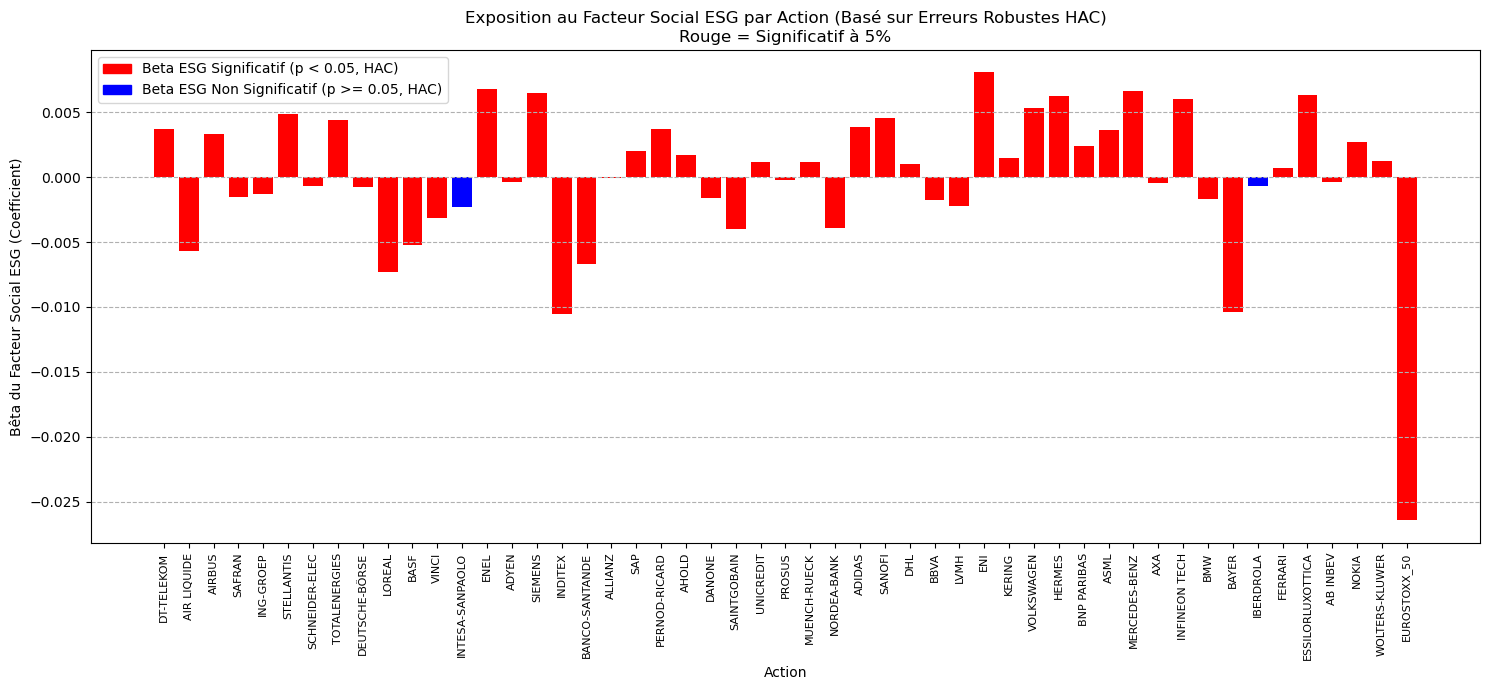

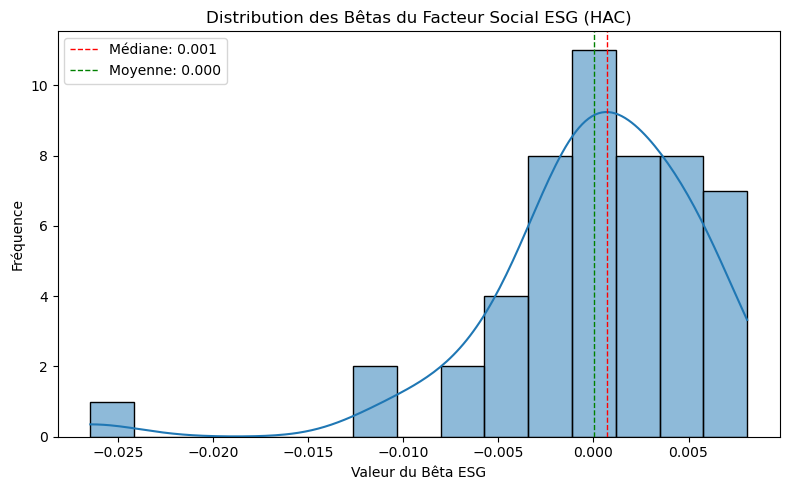


   Résumé des Bêtas ESG (HAC):
     Moyenne: 0.0000
     Médiane: 0.0007
     Min: -0.0264
     Max: 0.0081
     Nombre Significatifs (HAC, p < 0.05): 49 sur 51

   9.2 Génération des graphiques pour les Alphas...


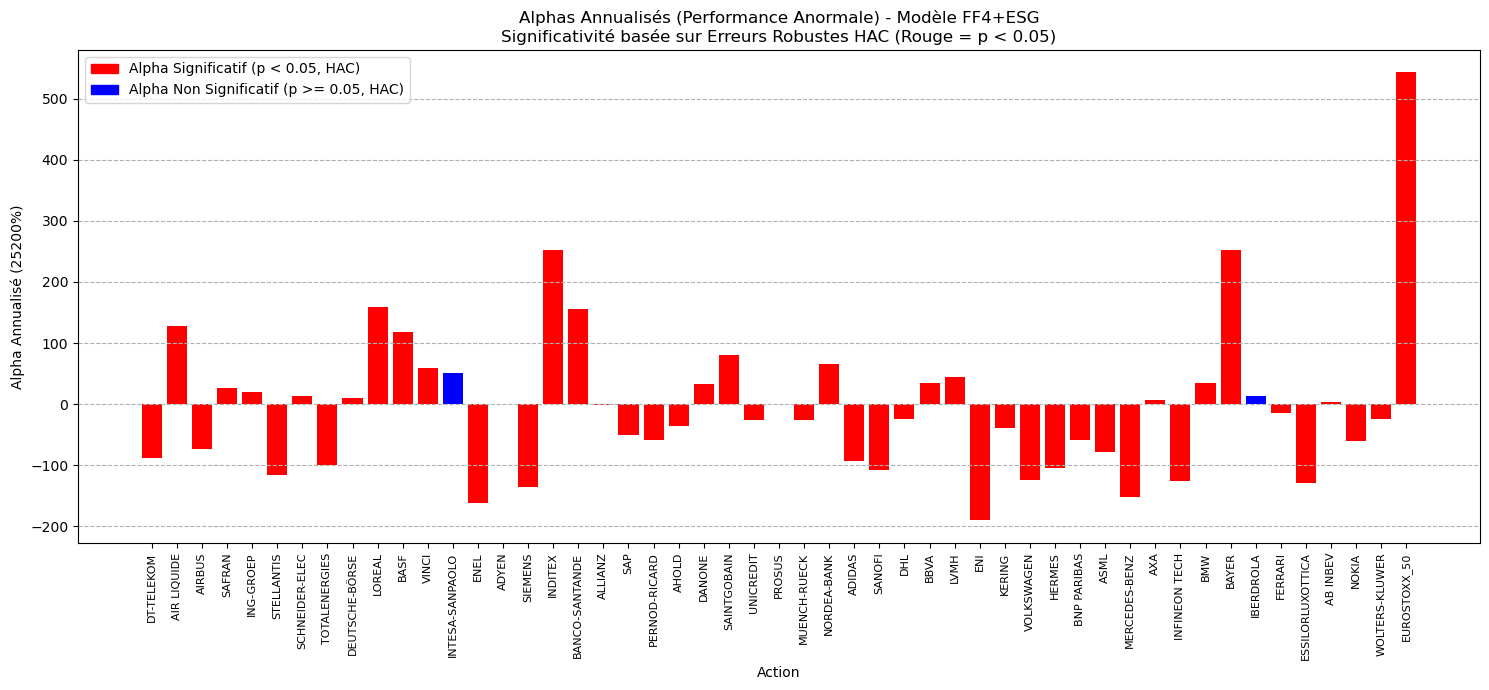


   Résumé des Alphas Annualisés (Significativité HAC):
     Moyenne: -1.7696
     Médiane: -14.7600
     Min: -190.0632
     Max: 543.0839
     Nombre Significatifs (HAC, p < 0.05): 47 sur 51

   9.3 Génération du graphique de relation Alpha vs Beta ESG...


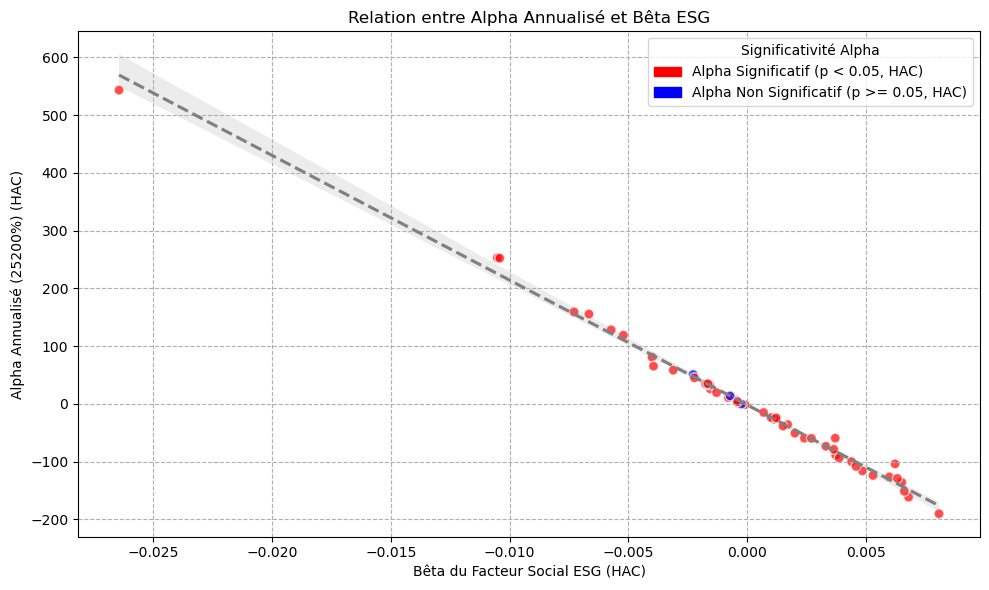


   Corrélation entre Beta ESG et Alpha Annualisé: -0.996

   9.4 Génération des graphiques pour le R² Ajusté...


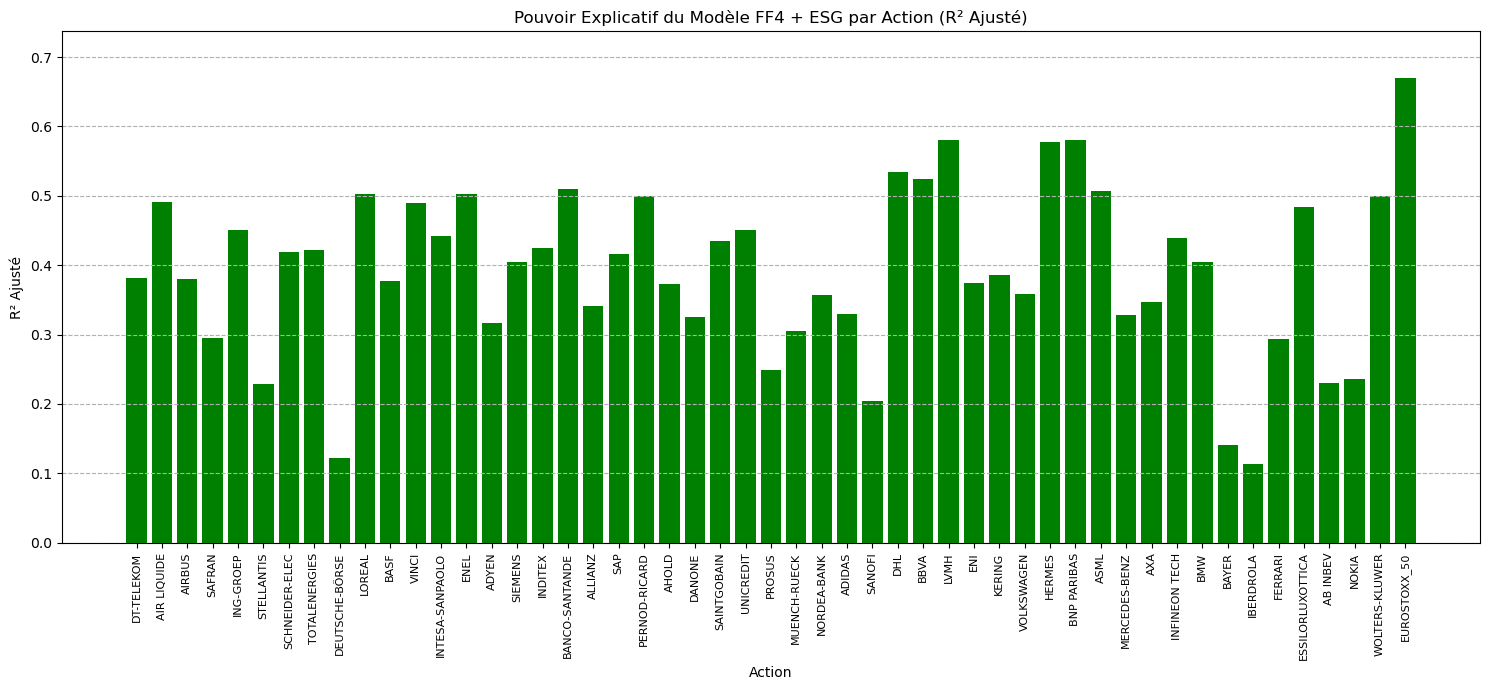

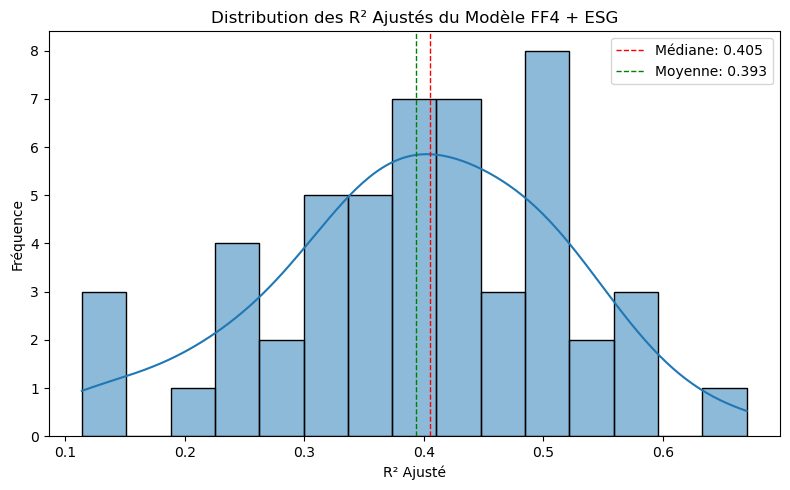


   Résumé des R² Ajustés:
     Moyenne: 0.393
     Médiane: 0.405
     Min: 0.114 (IBERDROLA)
     Max: 0.670 (EUROSTOXX_50)


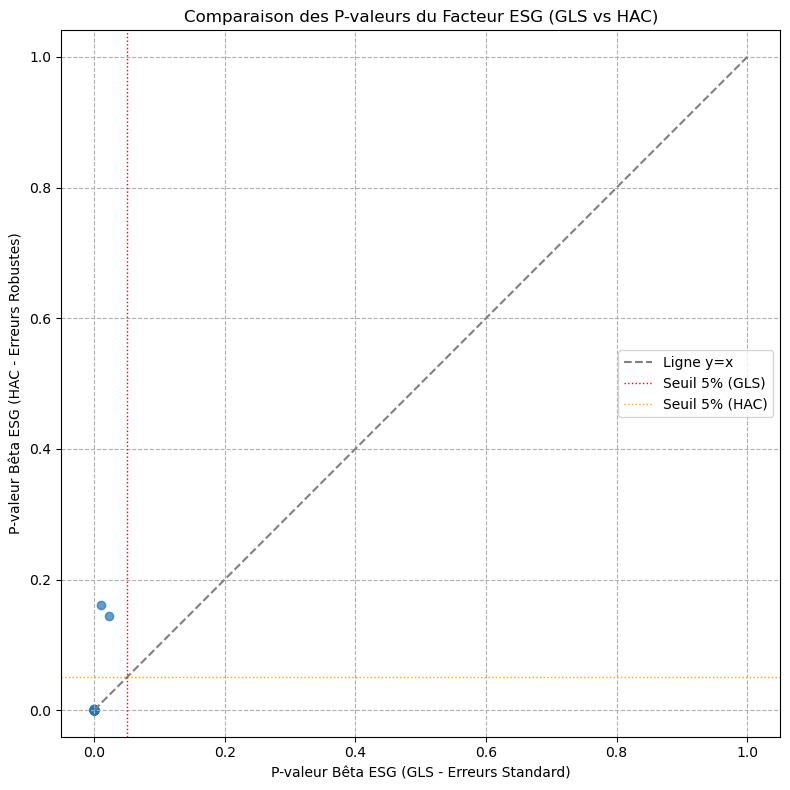


Changement de significativité ESG (GLS -> HAC) à p<0.05:
  Devenu Significatif: 0 tickers
  Devenu Non Significatif: 2 tickers

--- Fin des Visualisations ---


In [60]:
alpha_sig = 0.05
annualization_factor = 252

data_ok = True
if 'results_comparison_df' not in locals() or not isinstance(results_comparison_df, pd.DataFrame) or results_comparison_df.empty:
    print("\nERREUR: Le DataFrame 'results_comparison_df' est manquant, n'est pas un DataFrame valide ou est vide.")
    data_ok = False

if 'ticker_to_esg_name_map' not in locals() or not isinstance(ticker_to_esg_name_map, dict):
     print("\nERREUR: Le dictionnaire 'ticker_to_esg_name_map' est manquant ou n'est pas un dictionnaire.")
     print("Impossible de générer les graphiques avec les noms d'actions complets.")
     data_ok = False

if data_ok:
    print("\n--- 9. Visualisations de l'Impact du Facteur ESG (Basées sur Erreurs HAC) ---")

    tickers_in_results = results_comparison_df.index
    action_names = [ticker_to_esg_name_map.get(ticker, ticker) for ticker in tickers_in_results]
    x_positions = np.arange(len(tickers_in_results))

    print("\n   9.1 Génération des graphiques pour les Bêtas ESG...")
    plt.figure(figsize=(15, 7))
    betas_esg = results_comparison_df['Beta_ESG']
    pvals_esg_hac = results_comparison_df['Pval_ESG_HAC']
    significant_esg_hac = pvals_esg_hac < alpha_sig
    colors_esg = ['red' if sig else 'blue' for sig in significant_esg_hac]

    bars_esg = plt.bar(x_positions, betas_esg, color=colors_esg)

    plt.ylabel("Bêta du Facteur Social ESG (Coefficient)")
    plt.xlabel('Action')
    plt.title(f"Exposition au Facteur Social ESG par Action (Basé sur Erreurs Robustes HAC)\nRouge = Significatif à {alpha_sig*100:.0f}%")
    plt.xticks(ticks=x_positions, labels=action_names, rotation=90, fontsize=8)
    plt.grid(axis='y', linestyle='--')

    red_patch = mpatches.Patch(color='red', label=f'Beta ESG Significatif (p < {alpha_sig}, HAC)')
    blue_patch = mpatches.Patch(color='blue', label=f'Beta ESG Non Significatif (p >= {alpha_sig}, HAC)')
    plt.legend(handles=[red_patch, blue_patch])

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.histplot(betas_esg, kde=True, bins=15)
    plt.title('Distribution des Bêtas du Facteur Social ESG (HAC)')
    plt.xlabel('Valeur du Bêta ESG')
    plt.ylabel('Fréquence')
    median_beta = betas_esg.median()
    mean_beta = betas_esg.mean()
    plt.axvline(median_beta, color='red', linestyle='dashed', linewidth=1, label=f'Médiane: {median_beta:.3f}')
    plt.axvline(mean_beta, color='green', linestyle='dashed', linewidth=1, label=f'Moyenne: {mean_beta:.3f}')
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"\n   Résumé des Bêtas ESG (HAC):")
    print(f"     Moyenne: {mean_beta:.4f}")
    print(f"     Médiane: {median_beta:.4f}")
    print(f"     Min: {betas_esg.min():.4f}")
    print(f"     Max: {betas_esg.max():.4f}")
    print(f"     Nombre Significatifs (HAC, p < {alpha_sig}): {significant_esg_hac.sum()} sur {len(betas_esg)}")

    print("\n   9.2 Génération des graphiques pour les Alphas...")
    plt.figure(figsize=(15, 7))
    alphas_ann = results_comparison_df['Alpha'] * annualization_factor
    pvals_alpha_hac = results_comparison_df['Pval_Alpha_HAC']
    significant_alpha_hac = pvals_alpha_hac < alpha_sig
    colors_alpha = ['red' if sig else 'blue' for sig in significant_alpha_hac]

    bars_alpha = plt.bar(x_positions, alphas_ann, color=colors_alpha)

    plt.ylabel(f'Alpha Annualisé ({annualization_factor*100:.0f}%)')
    plt.xlabel('Action')
    plt.title(f'Alphas Annualisés (Performance Anormale) - Modèle FF4+ESG\nSignificativité basée sur Erreurs Robustes HAC (Rouge = p < {alpha_sig})')
    plt.xticks(ticks=x_positions, labels=action_names, rotation=90, fontsize=8)
    plt.grid(axis='y', linestyle='--')

    red_patch_alpha = mpatches.Patch(color='red', label=f'Alpha Significatif (p < {alpha_sig}, HAC)')
    blue_patch_alpha = mpatches.Patch(color='blue', label=f'Alpha Non Significatif (p >= {alpha_sig}, HAC)')
    plt.legend(handles=[red_patch_alpha, blue_patch_alpha])

    plt.tight_layout()
    plt.show()

    print(f"\n   Résumé des Alphas Annualisés (Significativité HAC):")
    print(f"     Moyenne: {alphas_ann.mean():.4f}")
    print(f"     Médiane: {alphas_ann.median():.4f}")
    print(f"     Min: {alphas_ann.min():.4f}")
    print(f"     Max: {alphas_ann.max():.4f}")
    print(f"     Nombre Significatifs (HAC, p < {alpha_sig}): {significant_alpha_hac.sum()} sur {len(alphas_ann)}")

    print("\n   9.3 Génération du graphique de relation Alpha vs Beta ESG...")
    plt.figure(figsize=(10, 6))
    x_vals = results_comparison_df['Beta_ESG']
    y_vals = alphas_ann
    colors_scatter = ['red' if sig_a else 'blue' for sig_a in significant_alpha_hac]

    plt.scatter(x_vals, y_vals, c=colors_scatter, alpha=0.7, edgecolors='w', s=50)

    sns.regplot(x=x_vals, y=y_vals, scatter=False, color='grey', line_kws={'linestyle':'--'})

    plt.xlabel('Bêta du Facteur Social ESG (HAC)')
    plt.ylabel(f'Alpha Annualisé ({annualization_factor*100:.0f}%) (HAC)')
    plt.title('Relation entre Alpha Annualisé et Bêta ESG')
    plt.grid(True, linestyle='--')

    red_patch_scatter = mpatches.Patch(color='red', label=f'Alpha Significatif (p < {alpha_sig}, HAC)')
    blue_patch_scatter = mpatches.Patch(color='blue', label=f'Alpha Non Significatif (p >= {alpha_sig}, HAC)')
    plt.legend(handles=[red_patch_scatter, blue_patch_scatter], title="Significativité Alpha")

    plt.tight_layout()
    plt.show()

    try:
        correlation = x_vals.corr(y_vals)
        print(f"\n   Corrélation entre Beta ESG et Alpha Annualisé: {correlation:.3f}")
    except Exception as e:
        print(f"\n   Impossible de calculer la corrélation Alpha/Beta ESG: {e}")

    print("\n   9.4 Génération des graphiques pour le R² Ajusté...")
    plt.figure(figsize=(15, 7))
    adj_r2 = results_comparison_df['R_Squared_Adj']

    bars_r2 = plt.bar(x_positions, adj_r2, color='green')

    plt.ylabel('R² Ajusté')
    plt.xlabel('Action')
    plt.title('Pouvoir Explicatif du Modèle FF4 + ESG par Action (R² Ajusté)')
    plt.xticks(ticks=x_positions, labels=action_names, rotation=90, fontsize=8)
    plt.ylim(0, max(adj_r2.max() * 1.1, 0.5))
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.histplot(adj_r2, kde=True, bins=15)
    plt.title('Distribution des R² Ajustés du Modèle FF4 + ESG')
    plt.xlabel('R² Ajusté')
    plt.ylabel('Fréquence')
    median_r2 = adj_r2.median()
    mean_r2 = adj_r2.mean()
    plt.axvline(median_r2, color='red', linestyle='dashed', linewidth=1, label=f'Médiane: {median_r2:.3f}')
    plt.axvline(mean_r2, color='green', linestyle='dashed', linewidth=1, label=f'Moyenne: {mean_r2:.3f}')
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"\n   Résumé des R² Ajustés:")
    print(f"     Moyenne: {adj_r2.mean():.3f}")
    print(f"     Médiane: {adj_r2.median():.3f}")

    try:
        min_r2_ticker = adj_r2.idxmin()
        max_r2_ticker = adj_r2.idxmax()

        min_index_position = results_comparison_df.index.get_loc(min_r2_ticker)
        max_index_position = results_comparison_df.index.get_loc(max_r2_ticker)

        min_action_name = action_names[min_index_position]
        max_action_name = action_names[max_index_position]

        print(f"     Min: {adj_r2.min():.3f} ({min_action_name})")
        print(f"     Max: {adj_r2.max():.3f} ({max_action_name})")

    except KeyError as e:
        print(f"     Erreur lors de la recherche du nom pour le ticker {e}.")
        print(f"     Min: {adj_r2.min():.3f} (Ticker: {min_r2_ticker})")
        print(f"     Max: {adj_r2.max():.3f} (Ticker: {max_r2_ticker})")
    except Exception as e:
         print(f"     Erreur lors de la récupération des noms min/max R²: {e}")
         print(f"     Min R² Ticker: {adj_r2.idxmin()}, Max R² Ticker: {adj_r2.idxmax()}")

    plt.figure(figsize=(8, 8))
    pval_gls = results_comparison_df['Pval_ESG_GLS']
    pval_hac = results_comparison_df['Pval_ESG_HAC']

    plt.scatter(pval_gls, pval_hac, alpha=0.7)
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Ligne y=x')
    plt.axvline(alpha_sig, color='red', linestyle=':', linewidth=1, label=f'Seuil {alpha_sig*100:.0f}% (GLS)')
    plt.axhline(alpha_sig, color='orange', linestyle=':', linewidth=1, label=f'Seuil {alpha_sig*100:.0f}% (HAC)')

    plt.xlabel('P-valeur Bêta ESG (GLS - Erreurs Standard)')
    plt.ylabel('P-valeur Bêta ESG (HAC - Erreurs Robustes)')
    plt.title('Comparaison des P-valeurs du Facteur ESG (GLS vs HAC)')
    plt.xlim(0, max(pval_gls.max(), pval_hac.max()) * 1.1)
    plt.ylim(0, max(pval_gls.max(), pval_hac.max()) * 1.1)
    plt.grid(True, linestyle='--')
    plt.legend()
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

    sig_gls = pval_gls < alpha_sig
    sig_hac = pval_hac < alpha_sig
    became_sig = (~sig_gls & sig_hac).sum()
    became_nonsig = (sig_gls & ~sig_hac).sum()
    print(f"\nChangement de significativité ESG (GLS -> HAC) à p<{alpha_sig}:")
    print(f"  Devenu Significatif: {became_sig} tickers")
    print(f"  Devenu Non Significatif: {became_nonsig} tickers")

    print("\n--- Fin des Visualisations ---")

In [61]:
print("\n--- Alignement Final des Données Rendements et ESG ---")

if 'stock_returns_aligned' not in locals():
    raise NameError("Le DataFrame 'stock_returns_aligned' n'a pas été trouvé.")
if 'esg_data_aligned' not in locals():
     if 'esg_data' in locals():
         esg_data_aligned = esg_data
         print("Utilisation du DataFrame 'esg_data' comme source ESG alignée.")
     else:
        raise NameError("Le DataFrame ESG aligné ('esg_data_aligned' ou 'esg_data') n'a pas été trouvé.")

print(f"Shape initiale stock_returns_aligned: {stock_returns_aligned.shape}")
print(f"Shape initiale esg_data_aligned:      {esg_data_aligned.shape}")

common_index = stock_returns_aligned.index.intersection(esg_data_aligned.index)

if len(common_index) < len(stock_returns_aligned.index) or len(common_index) < len(esg_data_aligned.index):
    print(f"AVERTISSEMENT: Les index ne correspondaient pas parfaitement. Alignement sur {len(common_index)} dates communes.")
    stock_returns_temp = stock_returns_aligned.loc[common_index].copy()
    esg_scores_temp = esg_data_aligned.loc[common_index].copy()
else:
    print("Les index (Dates) sont déjà alignés.")
    stock_returns_temp = stock_returns_aligned.copy()
    esg_scores_temp = esg_data_aligned.copy()

common_tickers = stock_returns_temp.columns.intersection(esg_scores_temp.columns)

common_tickers_list = sorted(list(common_tickers))

num_common = len(common_tickers_list)
num_returns_original = len(stock_returns_temp.columns)
num_esg_original = len(esg_scores_temp.columns)

if num_common == 0:
    raise ValueError("ERREUR CRITIQUE: Aucun ticker commun trouvé entre les rendements et les données ESG.")

if num_common < num_returns_original or num_common < num_esg_original:
    print(f"AVERTISSEMENT: Alignement des colonnes (Tickers).")
    print(f"  - {num_returns_original} tickers dans les rendements.")
    print(f"  - {num_esg_original} tickers dans les données ESG.")
    print(f"  => Conservation des {num_common} tickers communs.")

else:
    print("Les colonnes (Tickers) sont déjà alignées.")

stock_returns = stock_returns_temp[common_tickers_list].copy()
esg_scores = esg_scores_temp[common_tickers_list].copy()

if not stock_returns.index.equals(esg_scores.index):
    raise RuntimeError("ERREUR POST-ALIGNEMENT: Les index ne correspondent toujours pas.")
if not stock_returns.columns.equals(esg_scores.columns):
     raise RuntimeError("ERREUR POST-ALIGNEMENT: Les colonnes ne correspondent toujours pas.")

print("\n--- Alignement Terminé ---")
print(f"Shape finale stock_returns: {stock_returns.shape}")
print(f"Shape finale esg_scores:    {esg_scores.shape}")

print("\nLes DataFrames 'stock_returns' et 'esg_scores' sont maintenant alignés et prêts pour la construction du facteur.")


--- Alignement Final des Données Rendements et ESG ---
Shape initiale stock_returns_aligned: (988, 51)
Shape initiale esg_data_aligned:      (1043, 51)
AVERTISSEMENT: Les index ne correspondaient pas parfaitement. Alignement sur 988 dates communes.
Les colonnes (Tickers) sont déjà alignées.

--- Alignement Terminé ---
Shape finale stock_returns: (988, 51)
Shape finale esg_scores:    (988, 51)

Les DataFrames 'stock_returns' et 'esg_scores' sont maintenant alignés et prêts pour la construction du facteur.


In [62]:
ticker_to_esg_name_map = {
    "MC.PA": "LVMH",
    "RMS.PA": "HERMES",
    "OR.PA": "LOREAL",
    "SU.PA": "SCHNEIDER-ELEC",
    "SAN.PA": "SANOFI",
    "TTE.PA": "TOTALENERGIES",
    "EL.PA": "ESSILORLUXOTTICA",
    "AIR.PA": "AIRBUS",
    "AI.PA": "AIR LIQUIDE",
    "SAF.PA": "SAFRAN",
    "CS.PA": "AXA",
    "BNP.PA": "BNP PARIBAS",
    "DG.PA": "VINCI",
    "BN.PA": "DANONE",
    "SGO.PA": "SAINTGOBAIN",
    "RI.PA": "PERNOD-RICARD",
    "KER.PA": "KERING",
    "STLAP.PA": "STELLANTIS",
    "DHL.DE": "DHL",
    "BMW.DE": "BMW",
    "DTE.DE": "DT-TELEKOM",
    "SIE.DE": "SIEMENS",
    "ALV.DE": "ALLIANZ",
    "SAP.DE": "SAP",
    "MUV2.DE": "MUENCH-RUECK",
    "DB1.DE": "DEUTSCHE-BÖRSE",
    "MBG.DE": "MERCEDES-BENZ",
    "VOW3.DE": "VOLKSWAGEN",
    "BAS.DE": "BASF",
    "ADS.DE": "ADIDAS",
    "IFX.DE": "INFINEON TECH",
    "BAYN.DE": "BAYER",
    "ASML.AS": "ASML",
    "PRX.AS": "PROSUS",
    "INGA.AS": "ING-GROEP",
    "ADYEN.AS": "ADYEN",
    "WKL.AS": "WOLTERS-KLUWER",
    "AD.AS": "AHOLD",
    "ITX.MC": "INDITEX",
    "IBE.MC": "IBERDROLA",
    "SAN.MC": "BANCO-SANTANDE",
    "BBVA.MC": "BBVA",
    "ISP.MI": "INTESA-SANPAOLO",
    "UCG.MI": "UNICREDIT",
    "RACE.MI": "FERRARI",
    "ENEL.MI": "ENEL",
    "ENI.MI": "ENI",
    "ABI.BR": "AB INBEV",
    "NDA-FI.HE": "NORDEA-BANK",
    "NOKIA.HE": "NOKIA",
    "^STOXX50E": "EUROSTOXX_50"
}
if 'ticker_to_esg_name_map' not in locals() or not ticker_to_esg_name_map:
    raise NameError("Le dictionnaire 'ticker_to_esg_name_map' est nécessaire mais n'est pas défini ou est vide.")


print("\n--- 10. Construction et Analyse Détaillée des Portefeuilles ESG (High, Medium, Low S), du Facteur S et de l'Indice ---")

if 'stock_returns' not in locals() or 'esg_scores' not in locals():
     raise NameError("Les DataFrames 'stock_returns' et 'esg_scores' alignés doivent exister.")
if stock_returns.empty:
     raise ValueError("Le DataFrame de rendements 'stock_returns' est vide.")

low_quantile = 0.3
high_quantile = 0.7
index_ticker = "^STOXX50E"
trading_days_per_year = 252

print(f"\nParamètres:")
print(f"  - Quantile Bas (Short): < {low_quantile:.0%}")
print(f"  - Quantile Haut (Long): > {high_quantile:.0%}")
print(f"  - Quantile Médian: >= {low_quantile:.0%} et <= {high_quantile:.0%}")
print(f"  - Indice pour analyse & exclusion ESG: {index_ticker}")
print(f"  - Jours de trading par an: {trading_days_per_year}")

index_returns_series = None
index_name = ticker_to_esg_name_map.get(index_ticker, index_ticker)
if index_ticker in stock_returns.columns:
    index_returns_series = stock_returns[index_ticker].copy()
    index_returns_series.name = index_name
    print(f"\nAnalyse de l'indice '{index_name}' ({index_ticker}) trouvée dans les données.")
else:
    print(f"\nAvertissement : L'indice '{index_name}' ({index_ticker}) n'a pas été trouvé dans stock_returns. L'analyse et la comparaison avec l'indice seront ignorées.")

if 'esg_scores' not in locals() or esg_scores.empty:
    print("\nLes données 'esg_scores' sont manquantes ou vides. Impossible de construire les portefeuilles ESG.")
    build_esg_portfolios = False
else:
    build_esg_portfolios = True
    stock_returns_for_portfolios = stock_returns.copy()
    esg_scores_for_portfolios = esg_scores.copy()

    if index_ticker in stock_returns_for_portfolios.columns:
        print(f"  Exclusion de '{index_ticker}' des rendements pour la construction des portefeuilles ESG.")
        stock_returns_for_portfolios = stock_returns_for_portfolios.drop(columns=[index_ticker])

    if index_ticker in esg_scores_for_portfolios.columns:
        print(f"  Exclusion de '{index_ticker}' des scores ESG pour la construction des portefeuilles ESG.")
        esg_scores_for_portfolios = esg_scores_for_portfolios.drop(columns=[index_ticker])
    else:
        print(f"  Information : L'indice '{index_ticker}' n'était pas présent dans les scores ESG.")

    if stock_returns_for_portfolios.shape[1] == 0 or esg_scores_for_portfolios.shape[1] == 0:
        print(f"\nAVERTISSEMENT : Après exclusion de '{index_ticker}', il ne reste plus assez de données pour construire les portefeuilles ESG.")
        build_esg_portfolios = False
    else:
        common_index = stock_returns_for_portfolios.index.intersection(esg_scores_for_portfolios.index)
        common_cols = stock_returns_for_portfolios.columns.intersection(esg_scores_for_portfolios.columns)

        if len(common_cols) == 0:
            print(f"\nAVERTISSEMENT : Aucune colonne commune entre stock_returns et esg_scores après l'exclusion de {index_ticker}. Impossible de construire les portefeuilles ESG.")
            build_esg_portfolios = False
        else:
            stock_returns_for_portfolios = stock_returns_for_portfolios.loc[common_index, common_cols]
            esg_scores_for_portfolios = esg_scores_for_portfolios.loc[common_index, common_cols]
            print(f"  Nombre d'actions prises en compte pour les portefeuilles ESG : {len(common_cols)}")

if build_esg_portfolios:
    print(f"\nConstruction des portefeuilles ESG et du facteur S (sans {index_ticker})...")

    valid_data_mask = ~stock_returns_for_portfolios.isnull() & ~esg_scores_for_portfolios.isnull()
    esg_scores_masked = esg_scores_for_portfolios.where(valid_data_mask)
    ranks_pct = esg_scores_masked.rank(axis=1, pct=True, na_option='keep', method='average')
    high_s_mask = (ranks_pct > high_quantile) & valid_data_mask
    low_s_mask = (ranks_pct < low_quantile) & valid_data_mask
    medium_s_mask = (ranks_pct >= low_quantile) & (ranks_pct <= high_quantile) & valid_data_mask
    high_s_returns = stock_returns_for_portfolios.where(high_s_mask)
    low_s_returns = stock_returns_for_portfolios.where(low_s_mask)
    medium_s_returns = stock_returns_for_portfolios.where(medium_s_mask)
    avg_high_s_return = high_s_returns.mean(axis=1)
    avg_low_s_return = low_s_returns.mean(axis=1)
    avg_medium_s_return = medium_s_returns.mean(axis=1)
    s_factor_returns = avg_high_s_return - avg_low_s_return
    high_minus_medium = avg_high_s_return - avg_medium_s_return
    medium_minus_low = avg_medium_s_return - avg_low_s_return

    s_factor_returns.name = 'S_Factor (High-Low)'
    avg_high_s_return.name = 'High_S_Portfolio'
    avg_low_s_return.name = 'Low_S_Portfolio'
    avg_medium_s_return.name = 'Medium_S_Portfolio'
    high_minus_medium.name = 'High_vs_Medium'
    medium_minus_low.name = 'Medium_vs_Low'

    s_factor_returns_filled = s_factor_returns.fillna(0)
    avg_high_s_return_filled = avg_high_s_return.fillna(0)
    avg_low_s_return_filled = avg_low_s_return.fillna(0)
    avg_medium_s_return_filled = avg_medium_s_return.fillna(0)
    high_minus_medium_filled = high_minus_medium.fillna(0)
    medium_minus_low_filled = medium_minus_low.fillna(0)

    initial_nan_count_s = s_factor_returns.isnull().sum()
    if initial_nan_count_s > 0:
        print(f"  AVERTISSEMENT (ESG): {initial_nan_count_s} jours avec NaN dans les séries de rendements ESG (remplacés par 0 pour cumulatif/graphique).")
else:
    print("\nSkipping ESG portfolio construction due to previous warnings.")
    s_factor_returns, avg_high_s_return, avg_low_s_return, avg_medium_s_return, high_minus_medium, medium_minus_low = [None] * 6
    s_factor_returns_filled, avg_high_s_return_filled, avg_low_s_return_filled, avg_medium_s_return_filled, high_minus_medium_filled, medium_minus_low_filled = [None] * 6

index_returns_filled = None
if index_returns_series is not None:
    initial_nan_count_idx = index_returns_series.isnull().sum()
    if initial_nan_count_idx > 0:
         print(f"  AVERTISSEMENT (Indice): {initial_nan_count_idx} jours avec NaN dans les rendements de l'indice (remplacés par 0 pour cumulatif/graphique).")
    index_returns_filled = index_returns_series.fillna(0)

print("\n--- Analyse des Performances ---")

print("\nStatistiques Descriptives (Rendements Quotidiens - NaN ignorés):")
descriptive_stats_data = {}
if build_esg_portfolios:
    descriptive_stats_data.update({
        'High - Low': s_factor_returns.describe(),
        'High - Medium': high_minus_medium.describe(),
        'Medium - Low': medium_minus_low.describe(),
        'Portefeuille High S': avg_high_s_return.describe(),
        'Portefeuille Medium S': avg_medium_s_return.describe(),
        'Portefeuille Low S': avg_low_s_return.describe()
    })
if index_returns_series is not None:
    descriptive_stats_data[f'Indice ({index_name})'] = index_returns_series.describe()

if descriptive_stats_data:
    stats_df = pd.DataFrame(descriptive_stats_data)
    cols_order = []
    if build_esg_portfolios:
        cols_order.extend(['Portefeuille High S', 'Portefeuille Medium S', 'Portefeuille Low S',
                           'High - Low', 'High - Medium', 'Medium - Low'])
    if index_returns_series is not None:
        cols_order.append(f'Indice ({index_name})')

    stats_df = stats_df[[col for col in cols_order if col in stats_df.columns]]
    print(stats_df.to_string(float_format="%.6f"))
else:
    print("Aucune donnée de performance à afficher pour les statistiques descriptives.")

def calculate_annualized_stats(returns_series, name, trading_days=252):
    """Helper function to calculate and print annualized stats."""
    if returns_series is None or returns_series.empty:
        print(f"\n  Stratégie/Indice: {name}")
        print("    Pas de données fournies.")
        return

    valid_returns = returns_series.dropna()
    n_obs = len(valid_returns)

    print(f"\n  Stratégie/Indice: {name}")
    if n_obs < 2:
        print(f"    Pas assez de données valides ({n_obs}) pour calculer les statistiques annualisées.")
        return

    mean_daily = valid_returns.mean()
    std_daily = valid_returns.std()

    annualized_return = mean_daily * trading_days

    if std_daily < 1e-10:
        annualized_volatility = 0.0
        sharpe_ratio = np.inf if annualized_return > 1e-10 else (-np.inf if annualized_return < -1e-10 else 0)
        t_stat = np.inf if abs(mean_daily) > 1e-10 else 0
    else:
        annualized_volatility = std_daily * np.sqrt(trading_days)
        sharpe_ratio = annualized_return / annualized_volatility
        t_stat = (mean_daily / (std_daily / np.sqrt(n_obs)))

    print(f"    - Rendement Annualisé:     {annualized_return: >10.2%}")
    print(f"    - Volatilité Annualisée:   {annualized_volatility: >10.2%}")
    print(f"    - Ratio de Sharpe (simpl.): {sharpe_ratio: >10.2f}")
    print(f"    - T-statistique (moy. quot.): {t_stat: >10.2f}")
    print(f"    - Nombre d'observations:   {n_obs} / {len(returns_series)}")

print("\nStatistiques Annualisées des Portefeuilles, Facteurs et Indice:")
if build_esg_portfolios:
    calculate_annualized_stats(avg_high_s_return, 'Portefeuille High S', trading_days_per_year)
    calculate_annualized_stats(avg_medium_s_return, 'Portefeuille Medium S', trading_days_per_year)
    calculate_annualized_stats(avg_low_s_return, 'Portefeuille Low S', trading_days_per_year)
    calculate_annualized_stats(s_factor_returns, 'High - Low', trading_days_per_year)
    calculate_annualized_stats(high_minus_medium, 'High - Medium', trading_days_per_year)
    calculate_annualized_stats(medium_minus_low, 'Medium - Low', trading_days_per_year)

if index_returns_series is not None:
    calculate_annualized_stats(index_returns_series, f'Indice ({index_name})', trading_days_per_year)


if build_esg_portfolios:
    print("\n--- Composition des Portefeuilles ESG (Snapshot Dernier Jour Valide) ---")
    if not ranks_pct.empty:
        last_valid_date_for_ranks = ranks_pct.dropna(how='all').index[-1]
        print(f"Date du snapshot: {last_valid_date_for_ranks.strftime('%Y-%m-%d')}")

        if last_valid_date_for_ranks in high_s_mask.index:
            high_mask_last = high_s_mask.loc[last_valid_date_for_ranks]
            medium_mask_last = medium_s_mask.loc[last_valid_date_for_ranks]
            low_mask_last = low_s_mask.loc[last_valid_date_for_ranks]

            high_tickers_last = high_mask_last[high_mask_last].index.tolist()
            medium_tickers_last = medium_mask_last[medium_mask_last].index.tolist()
            low_tickers_last = low_mask_last[low_mask_last].index.tolist()

            high_names_last = sorted([ticker_to_esg_name_map.get(ticker, ticker + " (Mapping Manquant)") for ticker in high_tickers_last])
            medium_names_last = sorted([ticker_to_esg_name_map.get(ticker, ticker + " (Mapping Manquant)") for ticker in medium_tickers_last])
            low_names_last = sorted([ticker_to_esg_name_map.get(ticker, ticker + " (Mapping Manquant)") for ticker in low_tickers_last])

            print(f"\nPortefeuille High S ({len(high_names_last)} entreprises):")
            print(", ".join(high_names_last) if high_names_last else "Aucune")

            print(f"\nPortefeuille Medium S ({len(medium_names_last)} entreprises):")
            print(", ".join(medium_names_last) if medium_names_last else "Aucune")

            print(f"\nPortefeuille Low S ({len(low_names_last)} entreprises):")
            print(", ".join(low_names_last) if low_names_last else "Aucune")
        else:
            print(f"\nErreur : Impossible de récupérer la composition des portefeuilles pour la date {last_valid_date_for_ranks.strftime('%Y-%m-%d')}.")
    else:
        print("\nAucune donnée de classement ESG disponible pour afficher la composition.")
else:
    print("\nComposition des portefeuilles ESG non affichée car les portefeuilles n'ont pas été construits.")

print(f"\n--- Fin de l'analyse (incluant l'indice {index_name} pour comparaison) ---")


--- 10. Construction et Analyse Détaillée des Portefeuilles ESG (High, Medium, Low S), du Facteur S et de l'Indice ---

Paramètres:
  - Quantile Bas (Short): < 30%
  - Quantile Haut (Long): > 70%
  - Quantile Médian: >= 30% et <= 70%
  - Indice pour analyse & exclusion ESG: ^STOXX50E
  - Jours de trading par an: 252

Analyse de l'indice 'EUROSTOXX_50' (^STOXX50E) trouvée dans les données.
  Exclusion de '^STOXX50E' des rendements pour la construction des portefeuilles ESG.
  Exclusion de '^STOXX50E' des scores ESG pour la construction des portefeuilles ESG.
  Nombre d'actions prises en compte pour les portefeuilles ESG : 50

Construction des portefeuilles ESG et du facteur S (sans ^STOXX50E)...

--- Analyse des Performances ---

Statistiques Descriptives (Rendements Quotidiens - NaN ignorés):
       Portefeuille High S  Portefeuille Medium S  Portefeuille Low S  High - Low  High - Medium  Medium - Low  Indice (EUROSTOXX_50)
count           988.000000             988.000000          98


--- Vérification des variables nécessaires pour Graphique 1 ---

Génération Graphique 1: Rendements Cumulés...


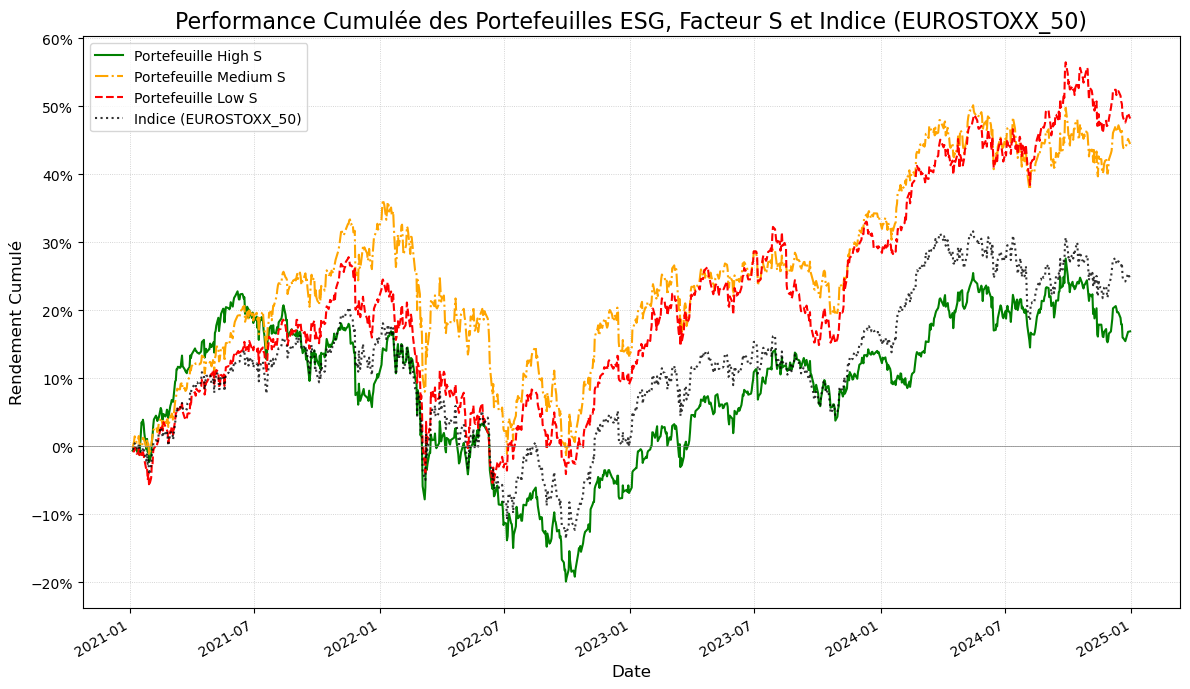


--- Vérification des variables nécessaires pour Graphiques 2-7 ---

Génération Graphique 2: Histogramme Facteur S...


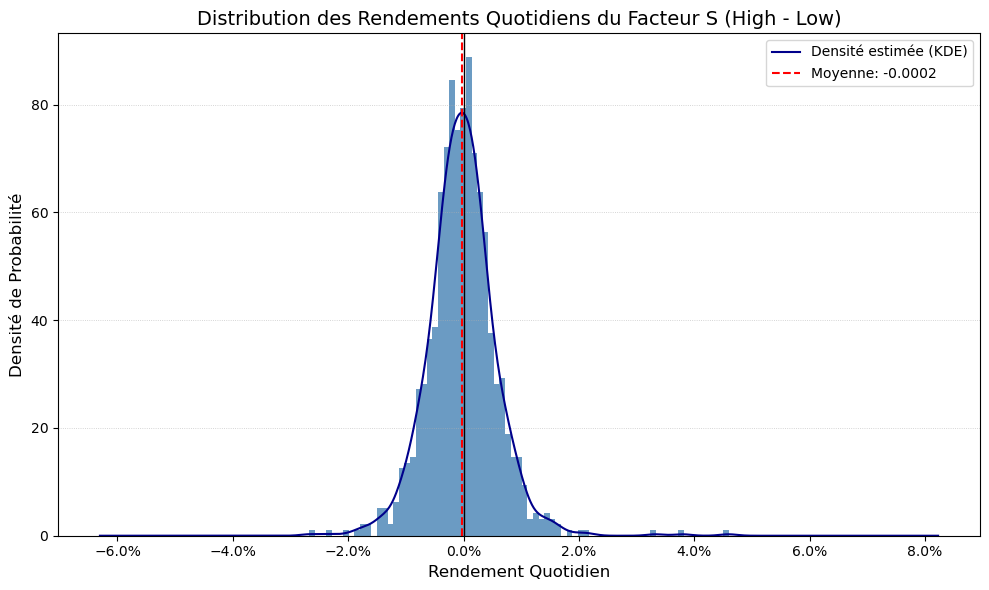


Génération Graphique 3: Performance Roulante Facteur S...


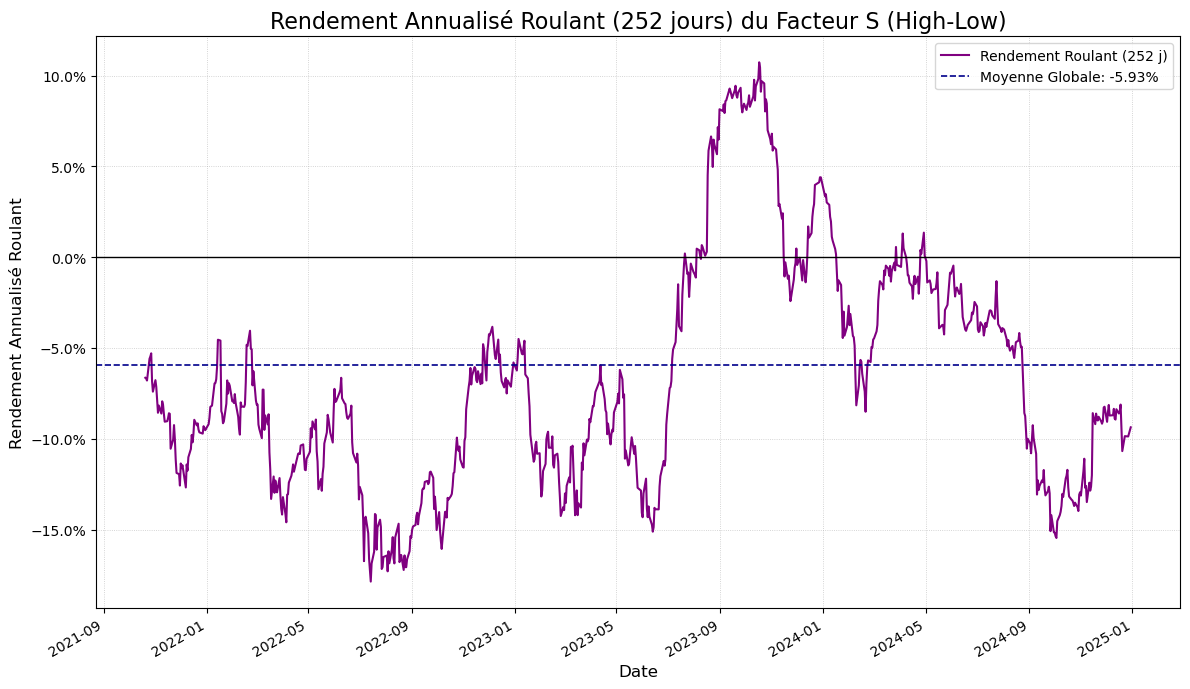


Génération Graphique 4: Taille des Portefeuilles...


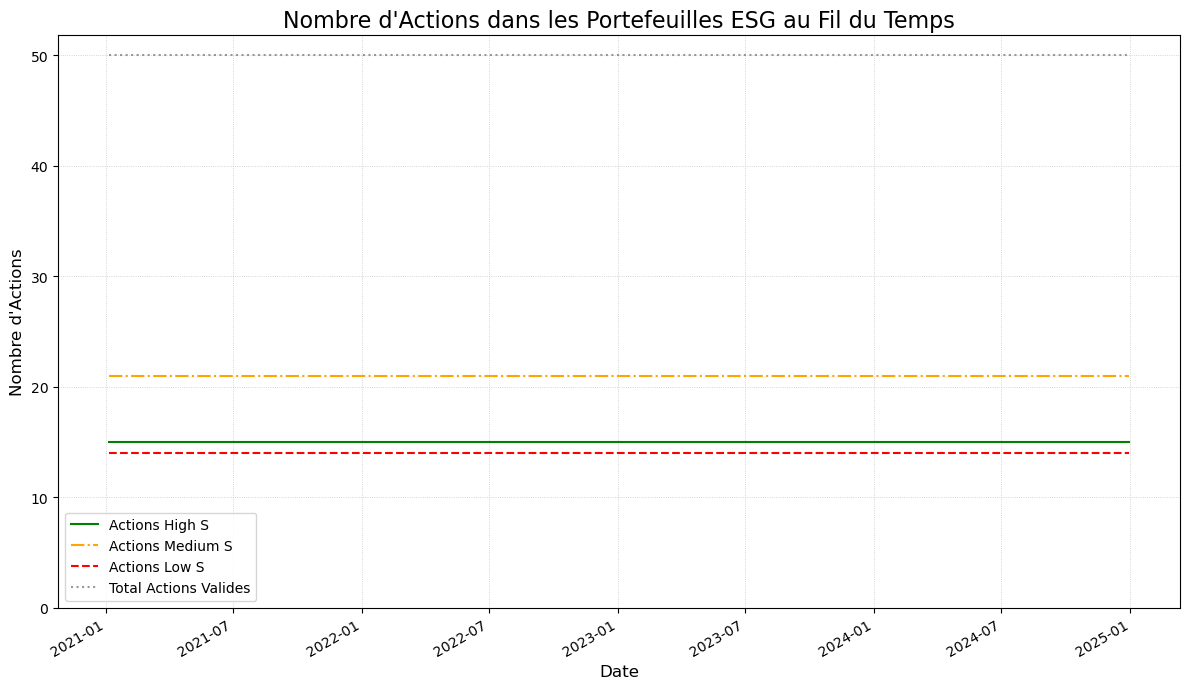


Génération Graphique 5: Différences Cumulées entre Portefeuilles...


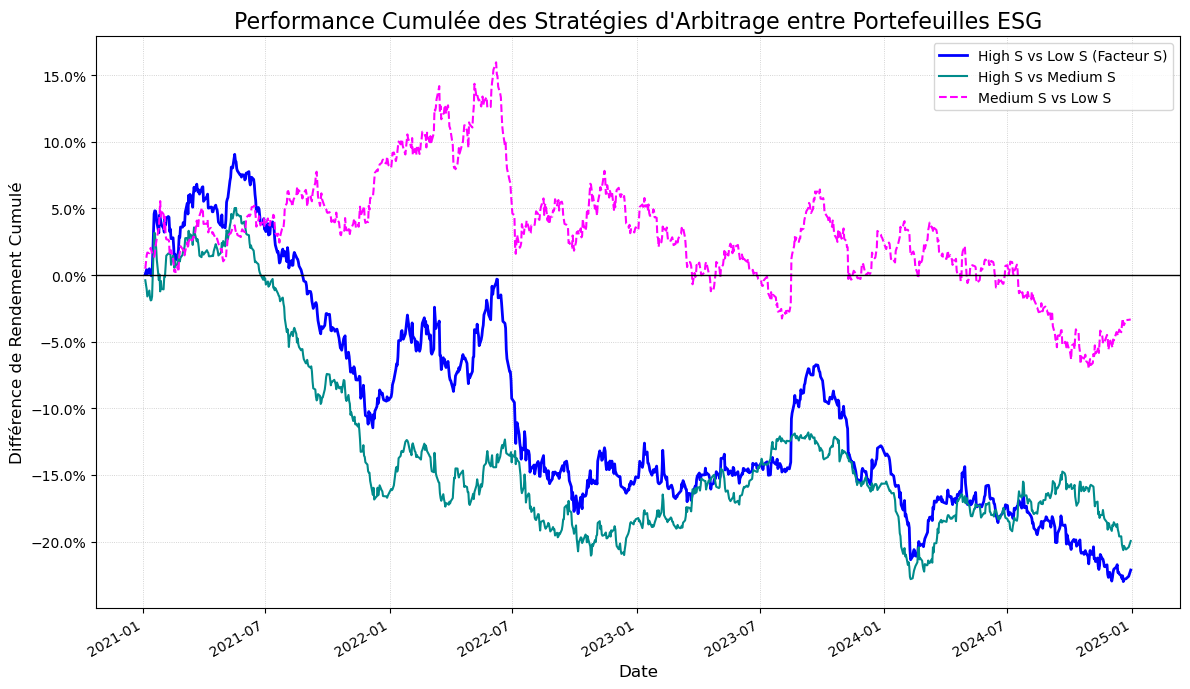


--- Vérification des données pour les graphiques de Répartition (G6, G7) ---
  -> Données trouvées pour la répartition au 2024-12-30: High=15, Medium=21, Low=14

Génération Graphique 6: Répartition des Portefeuilles (Camembert)...


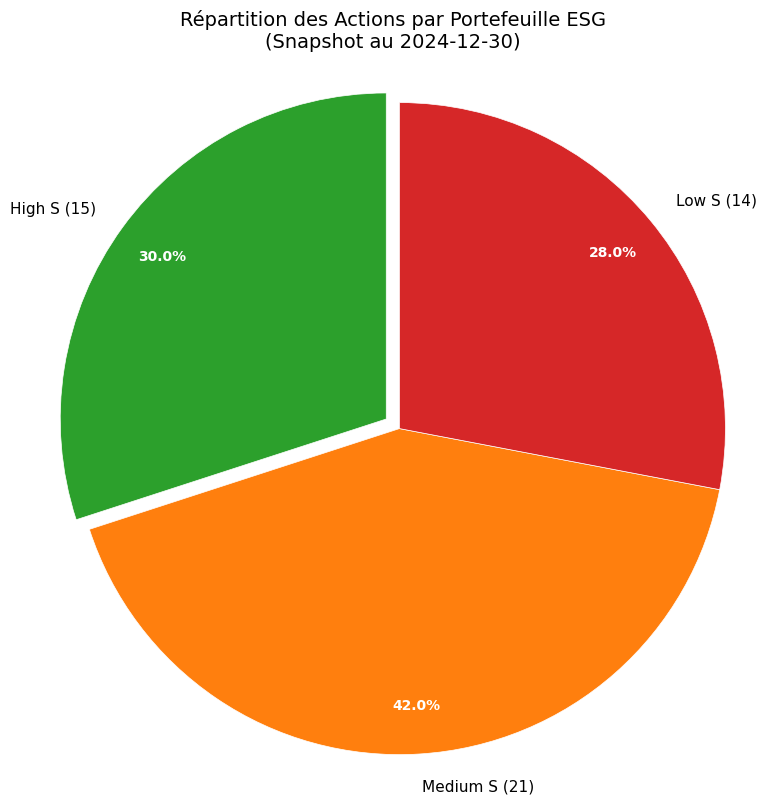


--- Fin de la génération des graphiques ---


In [63]:
trading_days_per_year = 252
n_obs_s = s_factor_returns.count()
mean_s_daily = s_factor_returns.mean()
std_s_daily = s_factor_returns.std()
annualized_return_s = mean_s_daily * trading_days_per_year
annualized_volatility_s = std_s_daily * np.sqrt(trading_days_per_year)
sharpe_ratio_s = (annualized_return_s / annualized_volatility_s) if annualized_volatility_s != 0 else 0
t_stat_s = (mean_s_daily / (std_s_daily / np.sqrt(n_obs_s))) if std_s_daily > 0 and n_obs_s > 0 else np.nan

last_valid_date = ranks_pct.dropna(how='all').index[-1]

high_mask_last = high_s_mask.loc[last_valid_date]
medium_mask_last = medium_s_mask.loc[last_valid_date]
low_mask_last = low_s_mask.loc[last_valid_date]

high_tickers_last = high_mask_last[high_mask_last].index.tolist()
medium_tickers_last = medium_mask_last[medium_mask_last].index.tolist()
low_tickers_last = low_mask_last[low_mask_last].index.tolist()

high_names_last = sorted([ticker_to_esg_name_map.get(ticker, ticker + " (Mapping Manquant)") for ticker in high_tickers_last])
medium_names_last = sorted([ticker_to_esg_name_map.get(ticker, ticker + " (Mapping Manquant)") for ticker in medium_tickers_last])
low_names_last = sorted([ticker_to_esg_name_map.get(ticker, ticker + " (Mapping Manquant)") for ticker in low_tickers_last])

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

required_vars_g1 = [
    's_factor_returns_filled', 'avg_high_s_return_filled', 'avg_low_s_return_filled',
    'avg_medium_s_return_filled',
    'index_returns_filled', 'index_name'
]

print("\n--- Vérification des variables nécessaires pour Graphique 1 ---")
all_vars_ok_g1 = True
plot_data_available_g1 = False

for var_name in required_vars_g1:
    if var_name not in locals():
        print(f"  AVERTISSEMENT: Variable requise '{var_name}' non trouvée pour Graphique 1.")
        all_vars_ok_g1 = False
    elif locals()[var_name] is None:
        print(f"  AVERTISSEMENT: Variable requise '{var_name}' est None pour Graphique 1.")
        all_vars_ok_g1 = False
    elif not isinstance(locals()[var_name], (pd.Series, pd.DataFrame, str, int, float)):
         print(f"  AVERTISSEMENT: Variable '{var_name}' n'est pas du type attendu pour Graphique 1.")
         all_vars_ok_g1 = False

if all_vars_ok_g1:
    if not s_factor_returns_filled.empty or \
       not avg_high_s_return_filled.empty or \
       not avg_low_s_return_filled.empty or \
       not avg_medium_s_return_filled.empty or \
       not index_returns_filled.empty:
           plot_data_available_g1 = True
    else:
        print("  -> Toutes les variables pour G1 existent mais sont vides.")
        all_vars_ok_g1 = False

low_quantile = 0.3
high_quantile = 0.7
trading_days_per_year = 252
rolling_window_days = 252

print("\nGénération Graphique 1: Rendements Cumulés...")

if all_vars_ok_g1 and plot_data_available_g1:
    try:
        cumulative_s_factor = (1 + s_factor_returns_filled).cumprod() - 1
        cumulative_high_s = (1 + avg_high_s_return_filled).cumprod() - 1
        cumulative_low_s = (1 + avg_low_s_return_filled).cumprod() - 1
        cumulative_medium_s = (1 + avg_medium_s_return_filled).cumprod() - 1
        cumulative_index = (1 + index_returns_filled).cumprod() - 1

        fig1, ax1 = plt.subplots(figsize=(12, 7))
        plot_performed_g1 = False

        if not cumulative_high_s.isna().all():
            cumulative_high_s.plot(ax=ax1, label='Portefeuille High S', color='green', linestyle='-')
            plot_performed_g1 = True
        if not cumulative_medium_s.isna().all():
            cumulative_medium_s.plot(ax=ax1, label='Portefeuille Medium S', color='orange', linestyle='-.')
            plot_performed_g1 = True
        if not cumulative_low_s.isna().all():
            cumulative_low_s.plot(ax=ax1, label='Portefeuille Low S', color='red', linestyle='--')
            plot_performed_g1 = True
        if not cumulative_index.isna().all():
            cumulative_index.plot(ax=ax1, label=f'Indice ({index_name})', color='black', linestyle=':', linewidth=1.5, alpha=0.8)
            plot_performed_g1 = True

        if plot_performed_g1:
            ax1.set_title(f'Performance Cumulée des Portefeuilles ESG, Facteur S et Indice ({index_name})', fontsize=16)
            ax1.set_xlabel('Date', fontsize=12)
            ax1.set_ylabel('Rendement Cumulé', fontsize=12)
            ax1.legend(loc='best', fontsize=10)
            ax1.grid(True, linestyle=':', linewidth=0.6, alpha=0.7)
            ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
            ax1.axhline(0, color='grey', linestyle='-', linewidth=0.5)
            ax1.tick_params(axis='both', which='major', labelsize=10)
            fig1.autofmt_xdate()
            plt.tight_layout()
            plt.show()
        else:
            print("  -> Aucune donnée cumulative non-nulle à tracer pour Graphique 1.")
            if 'fig1' in locals() and plt.fignum_exists(fig1.number): plt.close(fig1)

    except Exception as e:
        print(f"  Erreur lors de la génération du Graphique 1: {e}")
        if 'fig1' in locals() and plt.fignum_exists(fig1.number):
            plt.close(fig1)

else:
    print("  -> Skip Graphique 1 (Variables manquantes ou toutes les séries sont vides).")

print("\n--- Vérification des variables nécessaires pour Graphiques 2-7 ---")
required_vars_g2_g7 = [
    's_factor_returns',
    'rolling_window_days',
    'trading_days_per_year',
    'annualized_return_s',
    's_factor_returns_filled',
    'high_s_mask',
    'low_s_mask',
    'medium_s_mask',
    'valid_data_mask',
    'high_minus_medium_filled',
    'medium_minus_low_filled',
    'last_valid_date'
]
all_vars_ok_g2_g7 = True
missing_or_none = []

for var_name in required_vars_g2_g7:
     if var_name not in locals():
        missing_or_none.append(f"{var_name} (manquante)")
        all_vars_ok_g2_g7 = False
     elif locals()[var_name] is None and var_name not in ['annualized_return_s', 'last_valid_date']:
         missing_or_none.append(f"{var_name} (None)")
         all_vars_ok_g2_g7 = False

if missing_or_none:
     print(f"  AVERTISSEMENT: Variables manquantes ou None pour G2-G7: {', '.join(missing_or_none)}")

if all_vars_ok_g2_g7:

    print("\nGénération Graphique 2: Histogramme Facteur S...")
    if s_factor_returns is not None:
        s_factor_returns_dropna = s_factor_returns.dropna()
        if not s_factor_returns_dropna.empty:
            try:
                fig2, ax2 = plt.subplots(figsize=(10, 6))
                s_factor_returns_dropna.hist(bins=75, alpha=0.8, color='steelblue', ax=ax2, density=True)
                s_factor_returns_dropna.plot(kind='kde', color='darkblue', ax=ax2, label='Densité estimée (KDE)')
                ax2.set_title('Distribution des Rendements Quotidiens du Facteur S (High - Low)', fontsize=14)
                ax2.set_xlabel('Rendement Quotidien', fontsize=12)
                ax2.set_ylabel('Densité de Probabilité', fontsize=12)
                mean_val_s = s_factor_returns_dropna.mean()
                ax2.axvline(mean_val_s, color='red', linestyle='dashed', linewidth=1.5, label=f'Moyenne: {mean_val_s:.4f}')
                ax2.axvline(0, color='black', linestyle='solid', linewidth=1)
                ax2.legend(fontsize=10)
                ax2.grid(axis='y', linestyle=':', linewidth=0.6, alpha=0.7)
                ax2.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
                ax2.tick_params(axis='both', which='major', labelsize=10)
                plt.tight_layout()
                plt.show()
            except Exception as e:
                 print(f"  Erreur lors de la génération du Graphique 2: {e}")
                 if 'fig2' in locals() and plt.fignum_exists(fig2.number): plt.close(fig2)
        else:
            print("  -> Pas assez de données valides (après dropna) pour l'histogramme du Facteur S.")
    else:
        print("  -> Skip Graphique 2 (s_factor_returns is None).")

    print("\nGénération Graphique 3: Performance Roulante Facteur S...")
    if s_factor_returns_filled is not None:
        if not s_factor_returns_filled.empty and rolling_window_days <= len(s_factor_returns_filled):
            try:
                annualized_rolling_return_s = s_factor_returns_filled.rolling(window=rolling_window_days, min_periods=int(rolling_window_days*0.8)).mean() * trading_days_per_year
                if not annualized_rolling_return_s.dropna().empty:
                    fig3, ax3 = plt.subplots(figsize=(12, 7))
                    annualized_rolling_return_s.plot(ax=ax3, label=f'Rendement Roulant ({rolling_window_days} j)', color='purple', linewidth=1.5)
                    ax3.axhline(0, color='black', linestyle='-', linewidth=1)
                    if annualized_return_s is not None and not np.isnan(annualized_return_s):
                         ax3.axhline(annualized_return_s, color='darkblue', linestyle='dashed', linewidth=1.2, label=f'Moyenne Globale: {annualized_return_s:.2%}')
                    ax3.set_title(f'Rendement Annualisé Roulant ({rolling_window_days} jours) du Facteur S (High-Low)', fontsize=16)
                    ax3.set_xlabel('Date', fontsize=12)
                    ax3.set_ylabel('Rendement Annualisé Roulant', fontsize=12)
                    ax3.legend(loc='best', fontsize=10)
                    ax3.grid(True, linestyle=':', linewidth=0.6, alpha=0.7)
                    ax3.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
                    ax3.tick_params(axis='both', which='major', labelsize=10)
                    fig3.autofmt_xdate()
                    plt.tight_layout()
                    plt.show()
                else:
                    print(f"  -> Pas assez de données après calcul roulant pour Graphique 3 (fenêtre={rolling_window_days}j).")

            except Exception as e:
                print(f"  Erreur lors de la génération du Graphique 3: {e}")
                if 'fig3' in locals() and plt.fignum_exists(fig3.number): plt.close(fig3)
        else:
            print(f"  -> Série 's_factor_returns_filled' vide ou fenêtre roulante ({rolling_window_days}j) trop grande, skip Graphique 3.")
    else:
        print("  -> Skip Graphique 3 (s_factor_returns_filled is None).")

    print("\nGénération Graphique 4: Taille des Portefeuilles...")
    if high_s_mask is not None and low_s_mask is not None and medium_s_mask is not None and valid_data_mask is not None:
        try:
            n_high = high_s_mask.sum(axis=1)
            n_low = low_s_mask.sum(axis=1)
            n_medium = medium_s_mask.sum(axis=1)
            total_valid_stocks = valid_data_mask.sum(axis=1)

            if not n_high.empty or not n_medium.empty or not n_low.empty or not total_valid_stocks.empty:
                fig4, ax4 = plt.subplots(figsize=(12, 7))
                plot_performed_g4 = False
                if not n_high.empty: n_high.plot(ax=ax4, label='Actions High S', color='green', linestyle='-'); plot_performed_g4 = True
                if not n_medium.empty: n_medium.plot(ax=ax4, label='Actions Medium S', color='orange', linestyle='-.'); plot_performed_g4 = True
                if not n_low.empty: n_low.plot(ax=ax4, label='Actions Low S', color='red', linestyle='--'); plot_performed_g4 = True
                if not total_valid_stocks.empty: total_valid_stocks.plot(ax=ax4, label='Total Actions Valides', color='grey', linestyle=':', alpha=0.8, linewidth=1.5); plot_performed_g4 = True

                if plot_performed_g4:
                    ax4.set_title('Nombre d\'Actions dans les Portefeuilles ESG au Fil du Temps', fontsize=16)
                    ax4.set_xlabel('Date', fontsize=12)
                    ax4.set_ylabel('Nombre d\'Actions', fontsize=12)
                    ax4.legend(loc='best', fontsize=10)
                    ax4.grid(True, linestyle=':', linewidth=0.6, alpha=0.7)
                    ax4.set_ylim(bottom=0)
                    ax4.tick_params(axis='both', which='major', labelsize=10)
                    fig4.autofmt_xdate()
                    plt.tight_layout()
                    plt.show()
                else:
                    print("  -> Aucune donnée de taille de portefeuille non-vide à tracer pour G4.")
                    if 'fig4' in locals() and plt.fignum_exists(fig4.number): plt.close(fig4)
            else:
                print("  -> Aucune donnée de taille de portefeuille calculée ou toutes vides pour G4.")
        except Exception as e:
            print(f"  Erreur lors de la génération du Graphique 4: {e}")
            if 'fig4' in locals() and plt.fignum_exists(fig4.number): plt.close(fig4)
    else:
        print("  -> Skip Graphique 4 (Variables de masque manquantes/None).")

    print("\nGénération Graphique 5: Différences Cumulées entre Portefeuilles...")
    if s_factor_returns_filled is not None and high_minus_medium_filled is not None and medium_minus_low_filled is not None:
        try:
            cumulative_high_minus_low = (1 + s_factor_returns_filled).cumprod() - 1
            cumulative_high_minus_medium = (1 + high_minus_medium_filled).cumprod() - 1
            cumulative_medium_minus_low = (1 + medium_minus_low_filled).cumprod() - 1

            plot_g5 = False
            if not cumulative_high_minus_low.empty and cumulative_high_minus_low.nunique() > 1 : plot_g5 = True
            if not cumulative_high_minus_medium.empty and cumulative_high_minus_medium.nunique() > 1: plot_g5 = True
            if not cumulative_medium_minus_low.empty and cumulative_medium_minus_low.nunique() > 1: plot_g5 = True

            if plot_g5:
                fig5, ax5 = plt.subplots(figsize=(12, 7))
                if not cumulative_high_minus_low.empty and cumulative_high_minus_low.nunique() > 1:
                    cumulative_high_minus_low.plot(ax=ax5, label='High S vs Low S (Facteur S)', color='blue', linewidth=2.0)
                if not cumulative_high_minus_medium.empty and cumulative_high_minus_medium.nunique() > 1:
                    cumulative_high_minus_medium.plot(ax=ax5, label='High S vs Medium S', color='darkcyan', linestyle='-')
                if not cumulative_medium_minus_low.empty and cumulative_medium_minus_low.nunique() > 1:
                    cumulative_medium_minus_low.plot(ax=ax5, label='Medium S vs Low S', color='magenta', linestyle='--')

                ax5.axhline(0, color='black', linestyle='-', linewidth=1)
                ax5.set_title('Performance Cumulée des Stratégies d\'Arbitrage entre Portefeuilles ESG', fontsize=16)
                ax5.set_xlabel('Date', fontsize=12)
                ax5.set_ylabel('Différence de Rendement Cumulé', fontsize=12)
                ax5.legend(loc='best', fontsize=10)
                ax5.grid(True, linestyle=':', linewidth=0.6, alpha=0.7)
                ax5.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
                ax5.tick_params(axis='both', which='major', labelsize=10)
                fig5.autofmt_xdate()
                plt.tight_layout()
                plt.show()
            else:
                print("  -> Données de différence cumulée constantes, nulles ou vides, graphique 5 non généré.")
        except Exception as e:
             print(f"  Erreur lors de la génération du Graphique 5: {e}")
             if 'fig5' in locals() and plt.fignum_exists(fig5.number): plt.close(fig5)
    else:
        print("  -> Skip Graphique 5 (Variables de différence remplies manquantes/None).")

    print("\n--- Vérification des données pour les graphiques de Répartition (G6, G7) ---")
    data_ok_for_g6_g7 = False
    count_high, count_medium, count_low, total_counts = 0, 0, 0, 0

    if 'n_high' in locals() and 'n_medium' in locals() and 'n_low' in locals() and last_valid_date is not None:
        if last_valid_date in n_high.index and last_valid_date in n_medium.index and last_valid_date in n_low.index:
            count_high = n_high.loc[last_valid_date]
            count_medium = n_medium.loc[last_valid_date]
            count_low = n_low.loc[last_valid_date]
            total_counts = count_high + count_medium + count_low

            if total_counts > 0:
                print(f"  -> Données trouvées pour la répartition au {last_valid_date.strftime('%Y-%m-%d')}: High={count_high}, Medium={count_medium}, Low={count_low}")
                data_ok_for_g6_g7 = True
            else:
                print(f"  -> Aucune action classée (total=0) trouvée au {last_valid_date.strftime('%Y-%m-%d')}. Skip G6 et G7.")
        else:
            print(f"  -> Données de comptage ('n_high', etc.) non disponibles pour la date {last_valid_date.strftime('%Y-%m-%d')}. Skip G6 et G7.")
    else:
        print("  -> Skip G6 et G7 (Variables de comptage ('n_high', etc.) ou 'last_valid_date' manquantes/None).")

    if data_ok_for_g6_g7:

        print(f"\nGénération Graphique 6: Répartition des Portefeuilles (Camembert)...")
        try:
            fig6, ax6 = plt.subplots(figsize=(8, 8))
            labels = [f'High S ({count_high})', f'Medium S ({count_medium})', f'Low S ({count_low})']
            sizes = [count_high, count_medium, count_low]
            colors = ['#2ca02c', '#ff7f0e', '#d62728']
            explode = (0.05, 0, 0)

            wedges, texts, autotexts = ax6.pie(sizes,
                                               labels=labels,
                                               colors=colors,
                                               autopct='%1.1f%%',
                                               startangle=90,
                                               pctdistance=0.85,
                                               explode=explode,
                                               textprops=dict(color="black", size=11),
                                               wedgeprops = {'linewidth': 0.5, 'edgecolor': 'white'}
                                              )
            plt.setp(autotexts, size=10, weight="bold", color="white")
            ax6.set_title(f'Répartition des Actions par Portefeuille ESG\n(Snapshot au {last_valid_date.strftime("%Y-%m-%d")})',
                          fontsize=14, pad=20)
            ax6.axis('equal')
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"  Erreur lors de la génération du Graphique 6 (Camembert): {e}")
            if 'fig6' in locals() and plt.fignum_exists(fig6.number): plt.close(fig6)

else:
    print("\n--- Skip Graphiques 2-7 (variables clés manquantes ou None) ---")

print("\n--- Fin de la génération des graphiques ---")